<br></br>
<b><h2>Phase1: Data analysis & preparation</h2></b>

<br></br>
<b><h2>Importing Python Libraries</h2></b>

In [528]:
import random
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
import missingno as msno
import os

import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [ ]:
!pip install missingno

<br></br>
<b><h2>Loading the Data</h2></b>

In [529]:
# Load dataset
df = pd.read_csv('stroke_data.csv', delimiter = ',')
print(df.shape)
df.head(10)

(40910, 11)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


<br></br>
<b><h2>Insights</h2></b>

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [531]:
df.describe(include="all")

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [532]:
# df.loc[:, "DeadlineRespected"].value_counts(normalize=True) * 100
df.loc[:, "stroke"].value_counts()

1    20460
0    20450
Name: stroke, dtype: int64

In [533]:
(df.loc[:, "stroke"] == 1).sum()

20460

<br></br>
<b><h2>Data Cleaning</h2></b>

In [534]:
# Check for missing data and duplicates
df.isnull().sum()
df.dropna(inplace = True)
df.shape
# print('Duplicates:', df.duplicated().sum())

(40907, 11)

<AxesSubplot:>

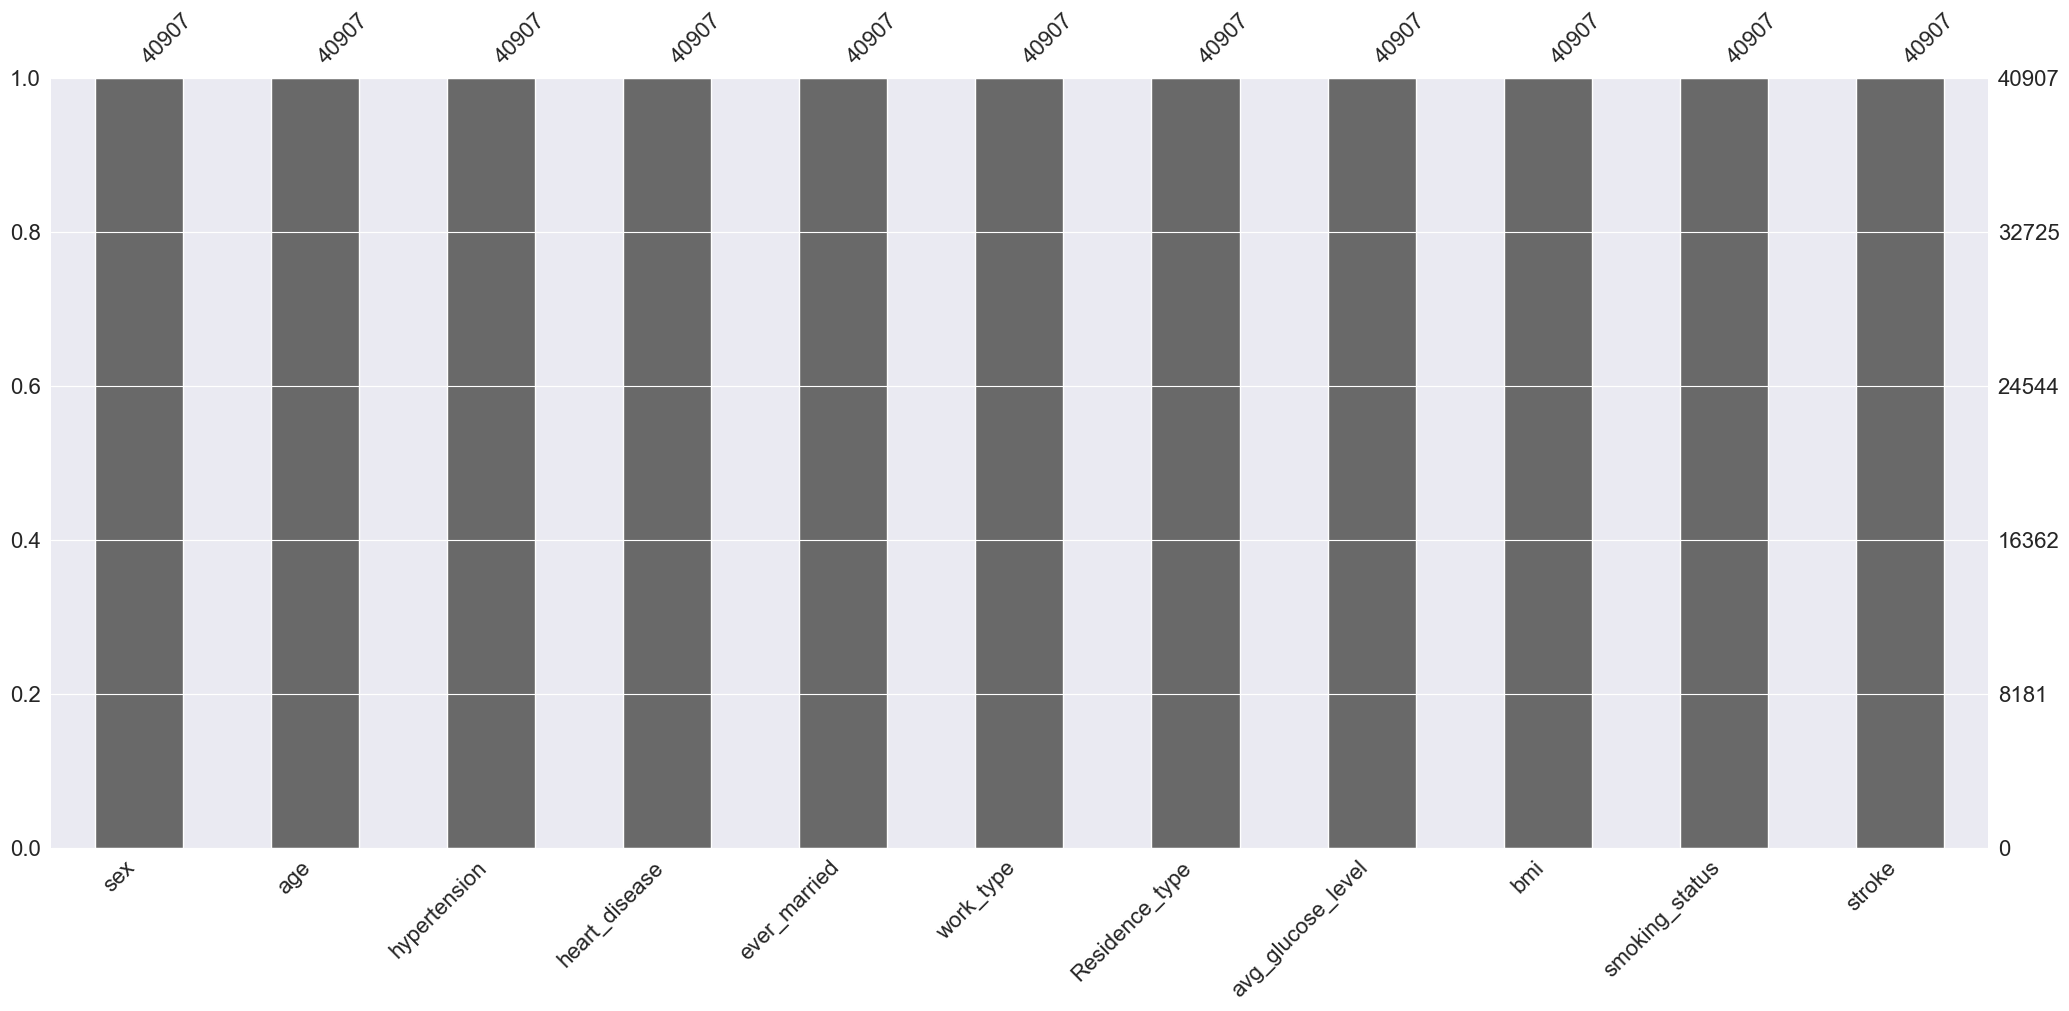

In [535]:
msno.bar(df)

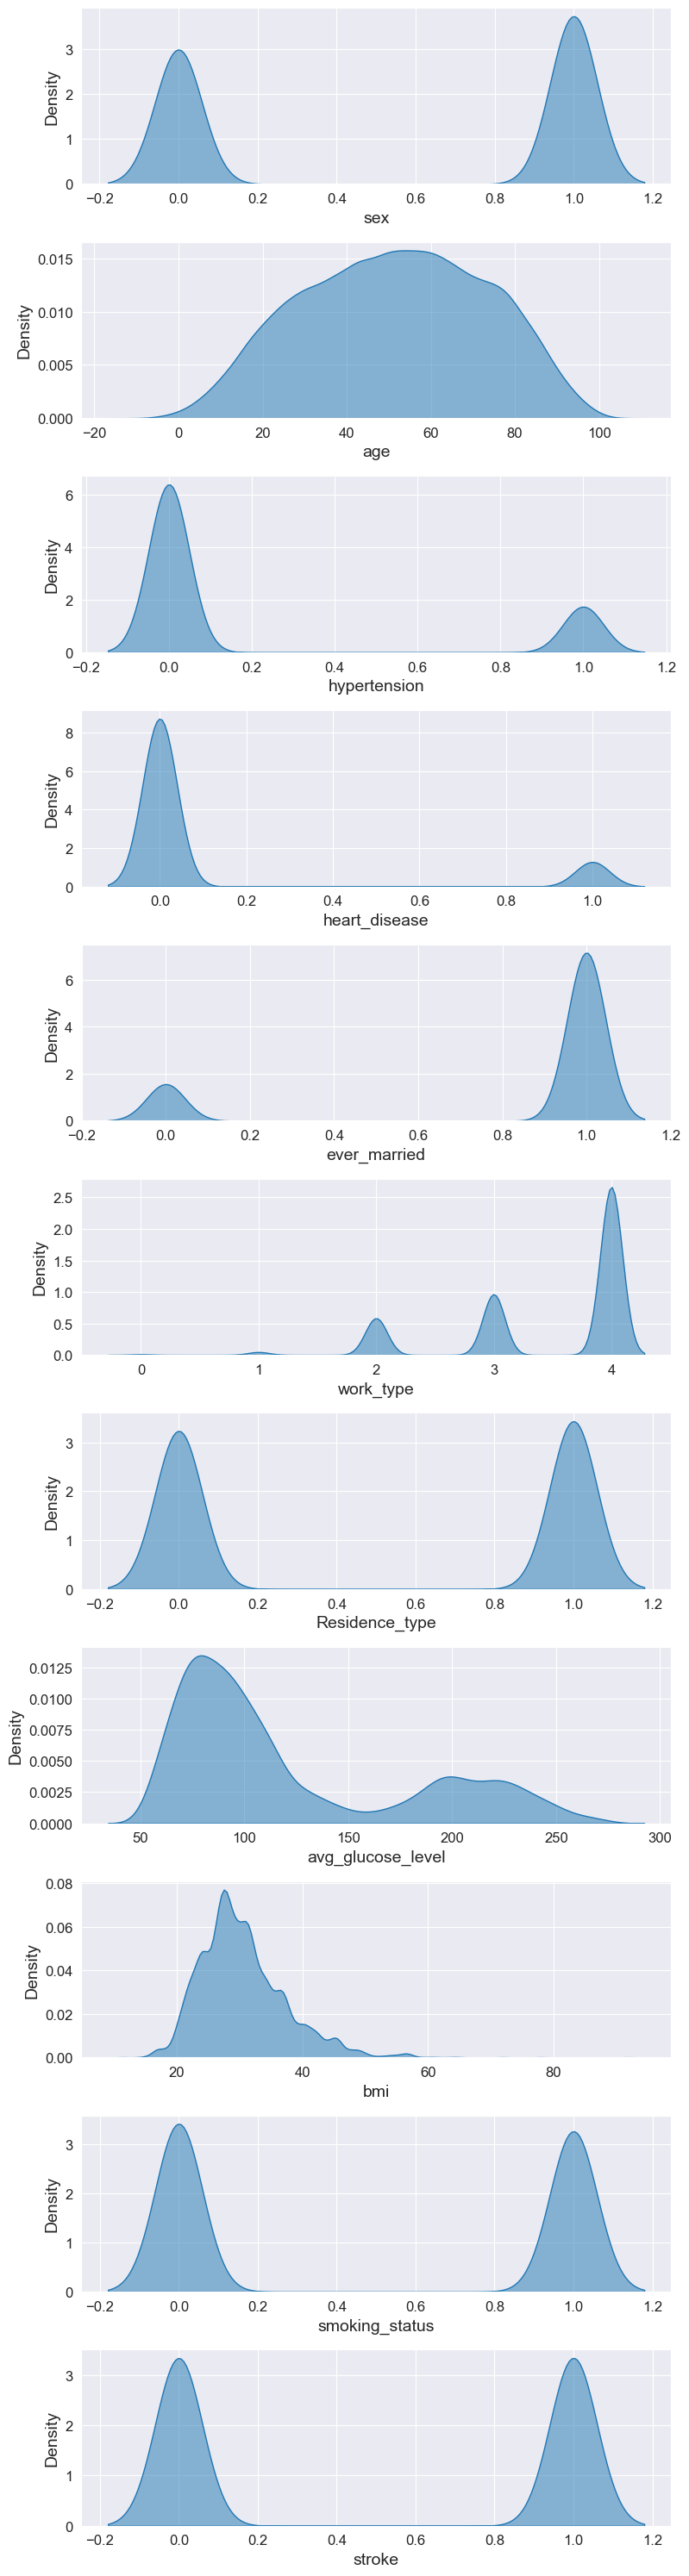

In [536]:
# Select the 11 features to plot
features = ["sex", "age", "hypertension", "heart_disease", "ever_married", 
            "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke"]

# Set the plot style
sns.set_style("darkgrid")

# Create a subplot for each feature
fig, axs = plt.subplots(11, 1, figsize=(8, 30))

# Loop through each feature and plot the density chart
for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, ax=axs[i], fill=True, alpha=0.5)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel("Density", fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='stroke', ylabel='count'>

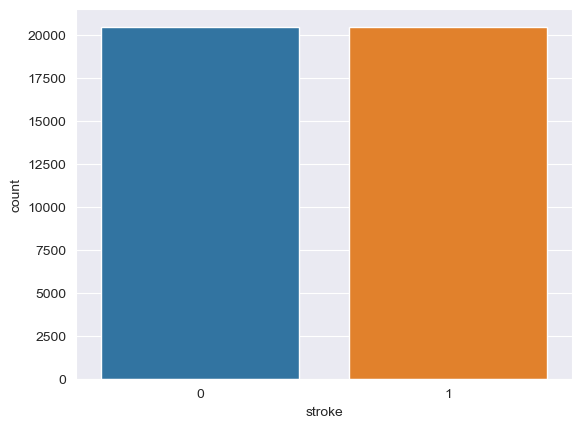

In [537]:
sns.countplot(data = df, x="stroke")

In [538]:
percentage = df.loc[:, "stroke"].value_counts(normalize=True) * 100
percentage

1    50.01589
0    49.98411
Name: stroke, dtype: float64

<b> Pie chart distribution of DeadlineRespected label </b>

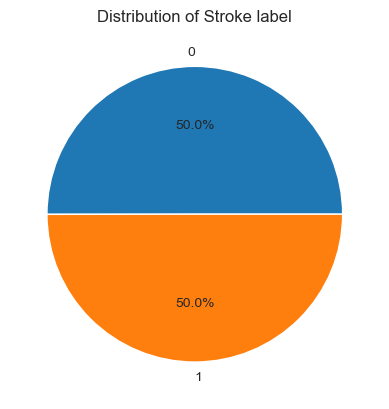

In [539]:
plt.pie(percentage, labels=["0", "1"], autopct = "%1.1f%%")
plt.title("Distribution of Stroke label")
plt.show()

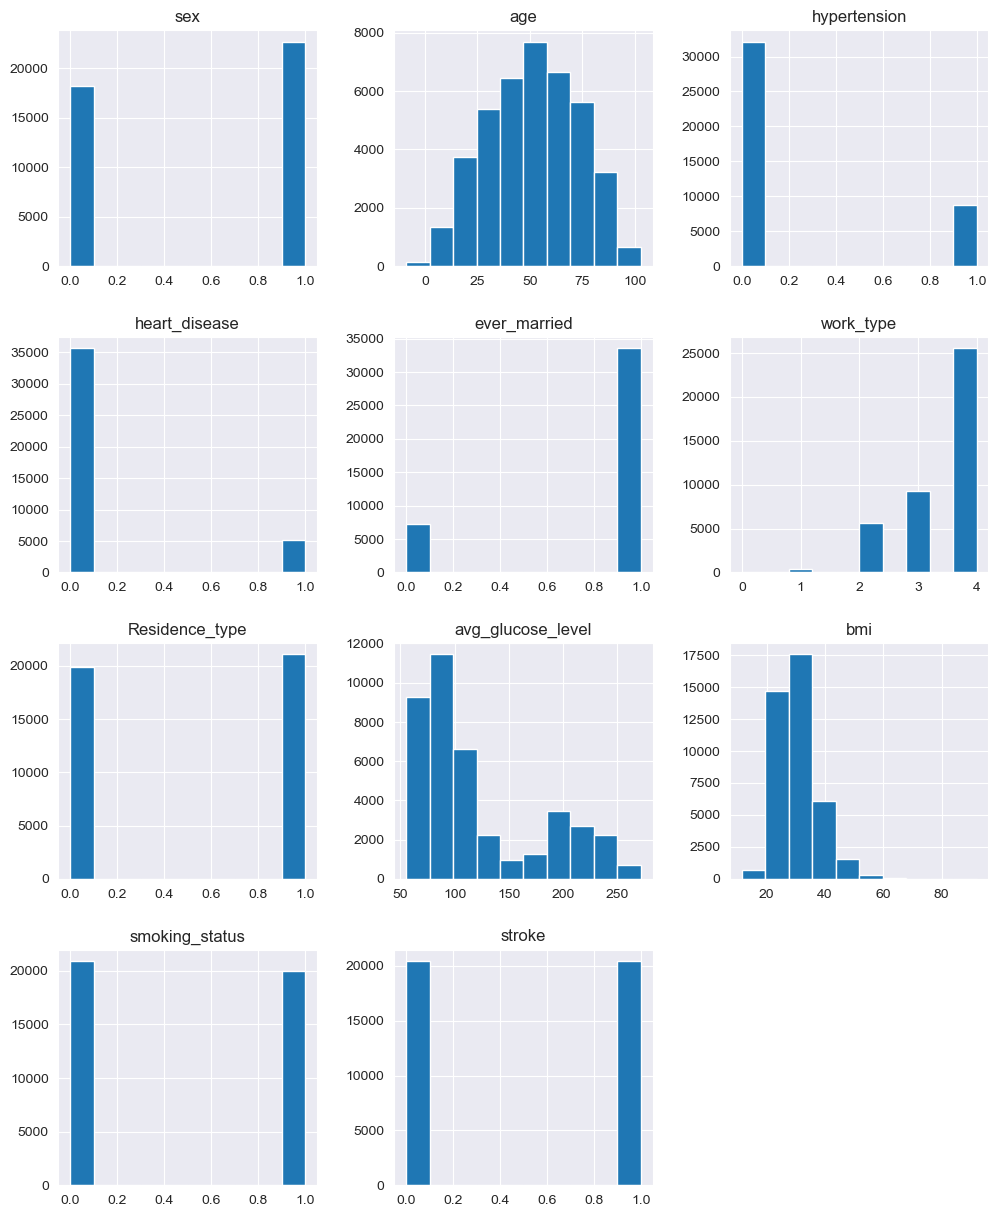

Above mean: 0.5001588970102916
Below mean: 0.49984110298970835


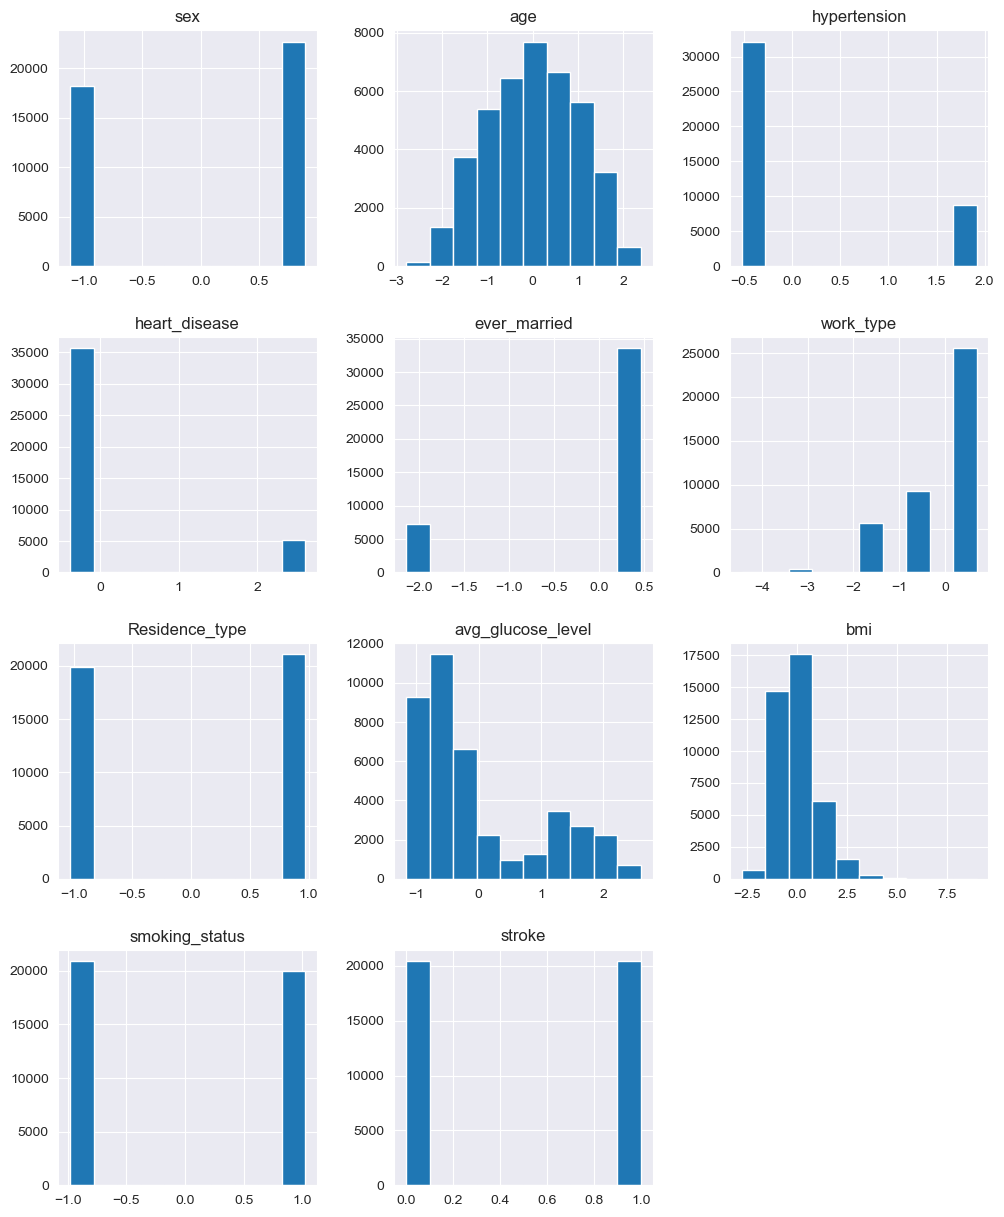

In [540]:
#Visualization before Normalization
df.hist(figsize=(12,15))
plt.show()


# Check balance of output labels
above_mean = (df['stroke'] > df['stroke'].mean()).sum()
below_mean = len(df) - above_mean
print('Above mean:', above_mean/len(df))
print('Below mean:', below_mean/len(df))

# # Normalize data
# min_val = min(df_new)
# max_val = max(df_new)
    
# # # Calculate the range of the data
# # data_range = max_val - min_val
    
    # Normalize the data
def z_score_normalization(column_name):
    series = df.loc[:, column_name]
    return (series - series.mean())/series.std()
    
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in df.columns:
    if column_name != "stroke":
        df[column_name] = z_score_normalization(column_name=column_name)

#Visualization after Normalization
df.hist(figsize=(12,15))
plt.show()


In [542]:
print(df.shape)

(40907, 11)


In [543]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<br></br>
<b><h2>Phase2: Build a model to overfit the entire dataset</h2></b>

In [148]:
# df_new = df.sample(frac=0.6)

In [232]:
# X = df_new.iloc[:, :-1].values
# y = df_new.iloc[:, -1].values

In [544]:
model = Sequential()

model.add(Dense(1, input_dim = df.shape[1] -1, activation = 'sigmoid'))
# model.add(Dense(16, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [545]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# checkpoint_file
# print(model.summary())

In [546]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.6571 - accuracy: 0.6334
Epoch 2/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6846
Epoch 3/100
1279/1279 [==============================] - 1s 978us/step - loss: 0.5996 - accuracy: 0.6835
Epoch 4/100
1279/1279 [==============================] - 1s 973us/step - loss: 0.5997 - accuracy: 0.6836
Epoch 5/100
1279/1279 [==============================] - 1s 983us/step - loss: 0.5996 - accuracy: 0.6839
Epoch 6/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6831
Epoch 7/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6824
Epoch 8/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6834
Epoch 9/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6828
Epoch 10/100
1279/1279 [==============================] - 1s 1ms/st

In [547]:
history.history["accuracy"]

[0.6333879232406616,
 0.684577226638794,
 0.6834527254104614,
 0.6835994124412537,
 0.6838927268981934,
 0.6830860376358032,
 0.6824259757995605,
 0.683354914188385,
 0.6827926635742188,
 0.6823282241821289,
 0.6835504770278931,
 0.6833304762840271,
 0.6829149127006531,
 0.6836971640586853,
 0.6825971007347107,
 0.6835260391235352,
 0.6824504137039185,
 0.6821326613426208,
 0.6824015378952026,
 0.6831104755401611,
 0.6821570992469788,
 0.681717038154602,
 0.6834527254104614,
 0.6839171648025513,
 0.6823770999908447,
 0.6834282875061035,
 0.6835016012191772,
 0.682939350605011,
 0.6822304129600525,
 0.6835260391235352,
 0.6837460398674011,
 0.6827437877655029,
 0.6836727261543274,
 0.6830615997314453,
 0.6830371618270874,
 0.6835994124412537,
 0.6822792887687683,
 0.6829637885093689,
 0.6826215386390686,
 0.6829149127006531,
 0.6830860376358032,
 0.6831104755401611,
 0.6829637885093689,
 0.6839416027069092,
 0.6824259757995605,
 0.6829149127006531,
 0.6833793520927429,
 0.68267047405242

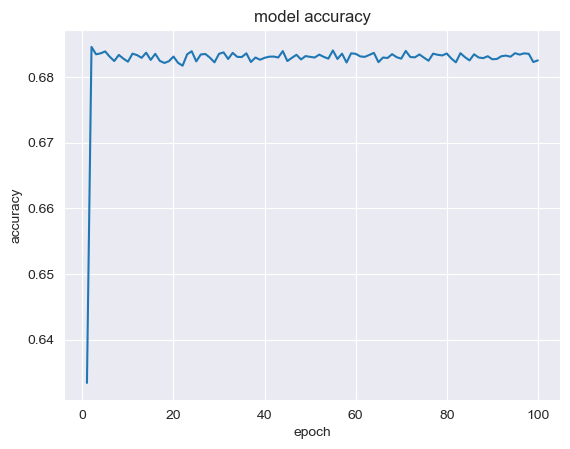

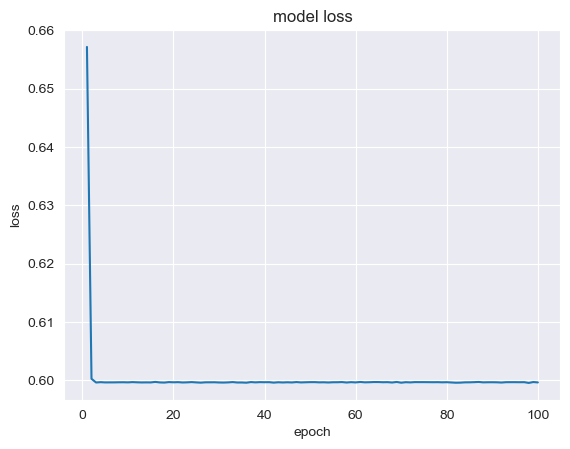

In [548]:
x1 = np.arange(1,101)

sns.lineplot(x=x1, y=history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

sns.lineplot(x=x1, y=history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [446]:
model1 = Sequential()

model1.add(Dense(16, activation="relu", input_dim=df.shape[1] - 1))
model1.add(Dense(8, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [447]:
history1 = model1.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5931 - accuracy: 0.6803
Epoch 2/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7122
Epoch 3/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7236
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5214 - accuracy: 0.7345
Epoch 5/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5053 - accuracy: 0.7477
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4887 - accuracy: 0.7609
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4729 - accuracy: 0.7687
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4604 - accuracy: 0.7768
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4507 - accuracy: 0.7842
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

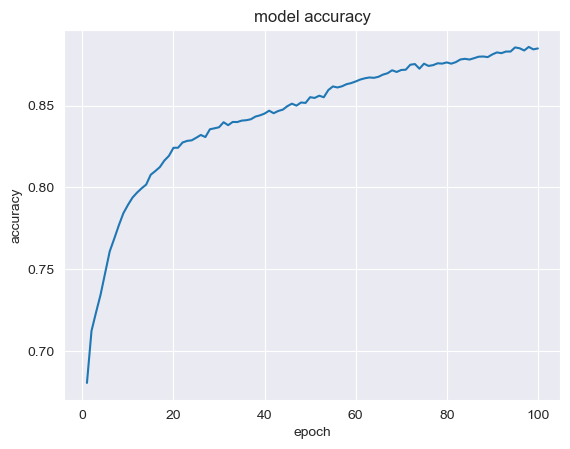

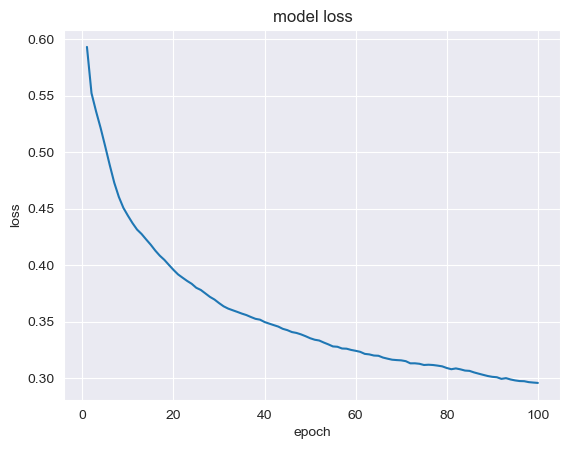

In [448]:
sns.lineplot(x=x1, y=history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

sns.lineplot(x=x1, y=history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [450]:
model2 = Sequential()

model2.add(Dense(32, activation="relu", input_dim=df.shape[1] - 1))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [451]:
history2 = model2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5756 - accuracy: 0.6945
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5112 - accuracy: 0.7413
Epoch 3/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4731 - accuracy: 0.7687
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4404 - accuracy: 0.7900
Epoch 5/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4131 - accuracy: 0.8064
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3886 - accuracy: 0.8203
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3662 - accuracy: 0.8335
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3472 - accuracy: 0.8441
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3304 - accuracy: 0.8557
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

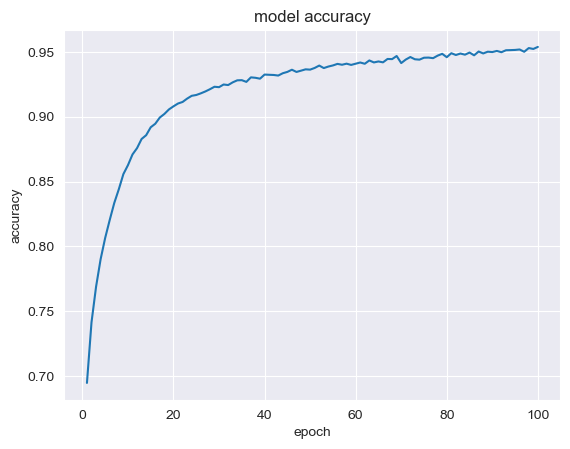

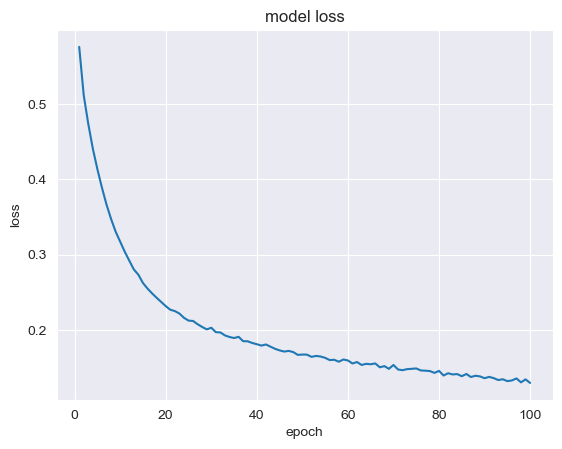

In [452]:
sns.lineplot(x=x1, y=history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

sns.lineplot(x=x1, y=history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [453]:
model3 = Sequential()

model3.add(Dense(32, activation="tanh", input_dim=df.shape[1] - 1))
model3.add(Dense(16, activation="tanh"))
model3.add(Dense(8, activation="tanh"))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [454]:
history3 = model3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5905 - accuracy: 0.6913
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5449 - accuracy: 0.7210
Epoch 3/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5041 - accuracy: 0.7505
Epoch 4/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4714 - accuracy: 0.7738
Epoch 5/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4460 - accuracy: 0.7896
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4262 - accuracy: 0.7996
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4066 - accuracy: 0.8093
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3858 - accuracy: 0.8198
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3662 - accuracy: 0.8288
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

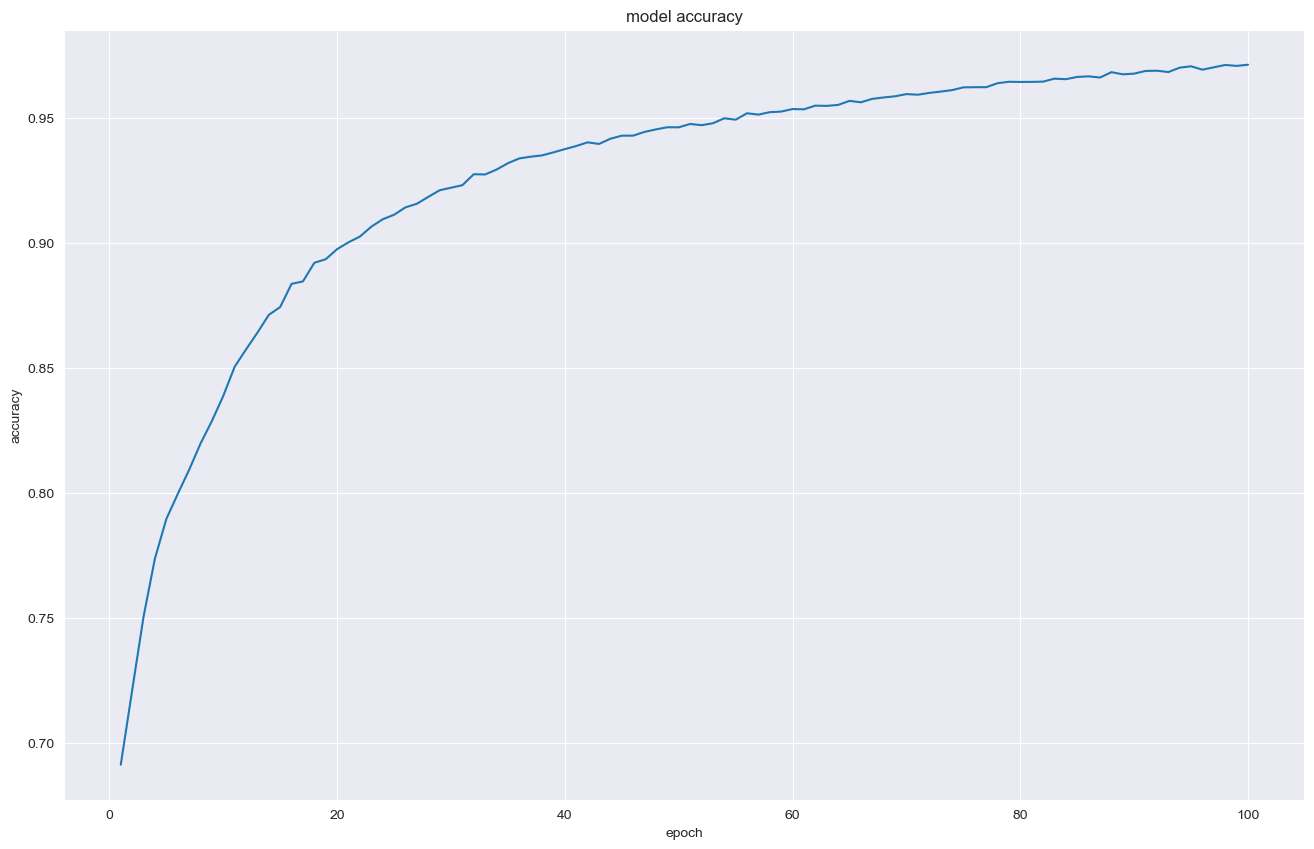

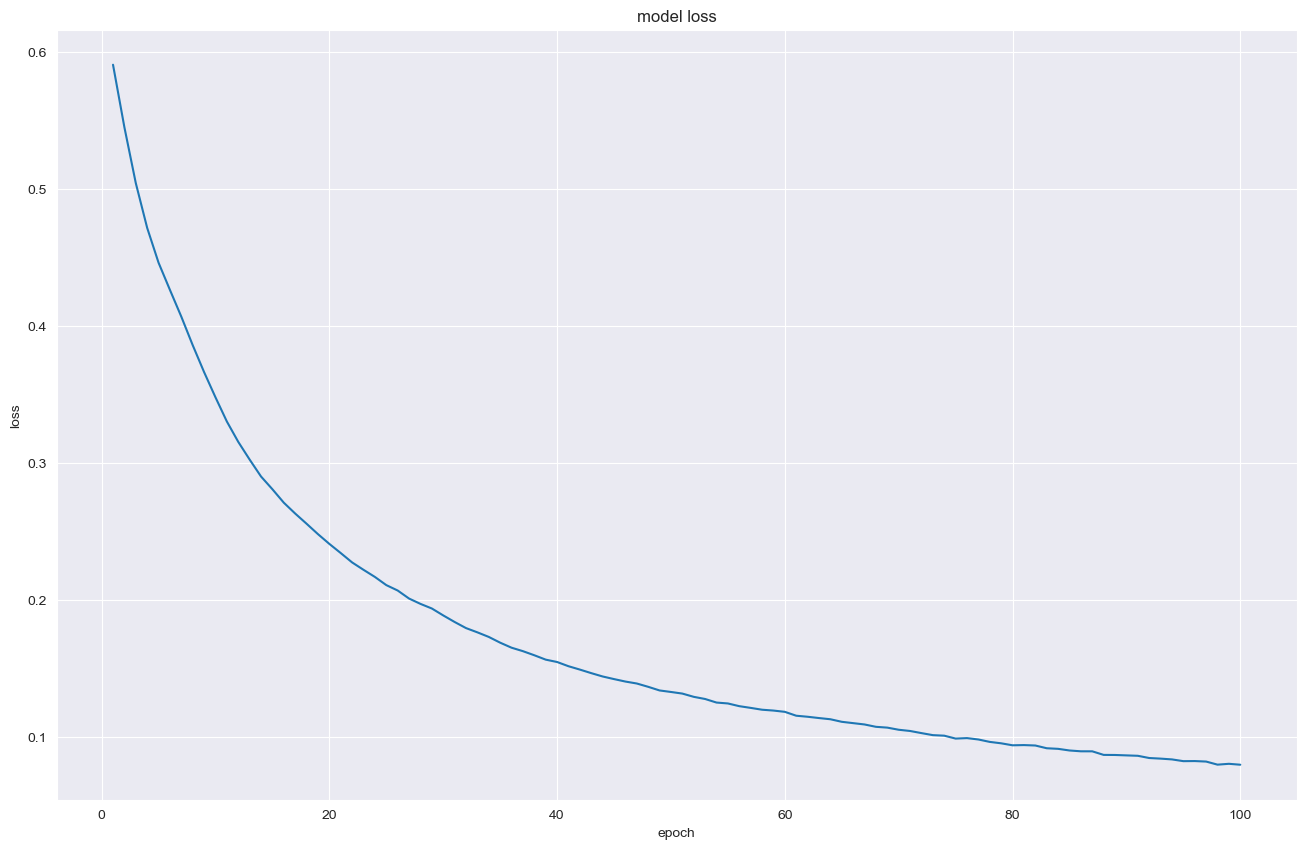

In [455]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [456]:
model4 = Sequential()

model4.add(Dense(40, activation="tanh", input_dim=df.shape[1] - 1))
model4.add(Dense(32, activation="tanh"))
model4.add(Dense(24, activation="tanh"))
model4.add(Dense(8, activation="tanh"))
model4.add(Dense(1, activation="sigmoid"))

model4.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [457]:
history4 = model4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 3s 1ms/step - loss: 0.5728 - accuracy: 0.7020
Epoch 2/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5082 - accuracy: 0.7463
Epoch 3/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4582 - accuracy: 0.7772
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4111 - accuracy: 0.8081
Epoch 5/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3621 - accuracy: 0.8329
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3202 - accuracy: 0.8556
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.2873 - accuracy: 0.8738
Epoch 8/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.2601 - accuracy: 0.8862
Epoch 9/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.2401 - accuracy: 0.8945
Epoch 10/100
1279/1279 [==============================] - 3s 2ms/step - l

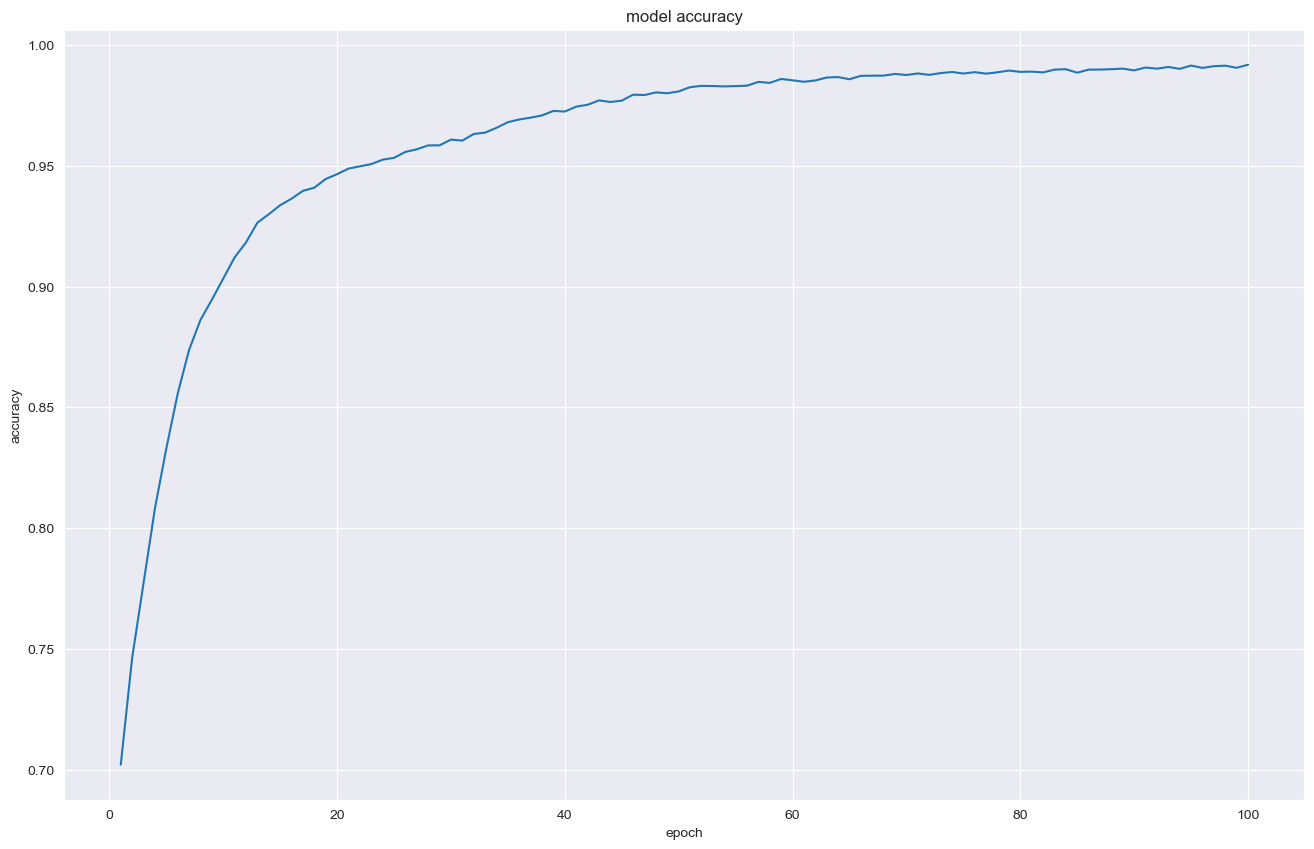

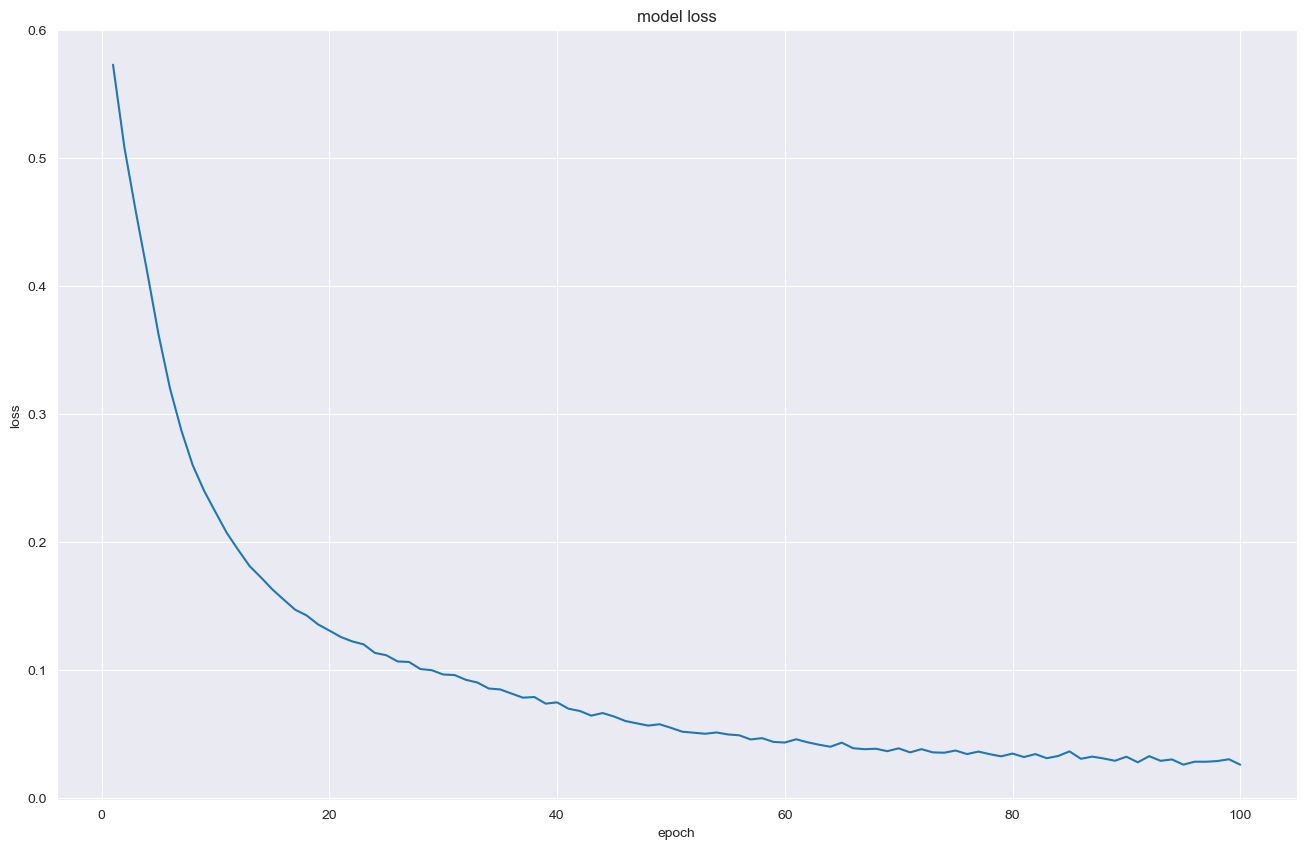

In [458]:
plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

<h5>Observation</h5><br>


The above model is a neural network with 5 layers for binary classification. It has 40 neurons in the input layer and uses the 'tanh' activation function. The 3 hidden layers have 32, 24, and 8 neurons, respectively, and also use the 'tanh' activation function. The output layer has a single neuron and uses a 'sigmoid' activation function. The model uses binary cross-entropy loss function, Adam optimizer, and accuracy as the metric. The use of the 'tanh' activation function in the hidden layers suggests that the model can capture non-linear relationships between input features and the stroke(Output) variable.

The model shows the signs of better overfit and convergence at epochs 100 which has accuracy of 99.18 and there is no futher improvement in the accuracy.


In [549]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.117129,1.742157,-0.521552,-0.382660,0.466409,-0.590440,-1.030143,-0.794617,-0.878745,1.023112,1
1,0.895130,0.216087,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.745278,3.276154,1.023112,0
2,0.895130,0.493554,-0.521552,-0.382660,-2.143988,0.690078,0.970715,-0.570858,1.081665,-0.977387,1
3,0.895130,1.233467,-0.521552,-0.382660,0.466409,-1.870959,-1.030143,-1.108018,-1.463942,-0.977387,0
4,-1.117129,-0.153870,-0.521552,-0.382660,0.466409,0.690078,0.970715,-0.257456,1.198705,1.023112,1
5,-1.117129,1.048489,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-1.006562,-0.147248,-0.977387,1
6,0.895130,0.123598,-0.521552,2.613221,0.466409,0.690078,-1.030143,1.901956,0.949996,-0.977387,1
7,0.895130,-0.015136,-0.521552,-0.382660,-2.143988,-0.590440,0.970715,-0.691423,-0.937264,1.023112,1
8,0.895130,0.123598,-0.521552,-0.382660,0.466409,-0.590440,0.970715,1.020124,-1.478572,-0.977387,0
9,-1.117129,-1.818673,-0.521552,2.613221,0.466409,0.690078,-1.030143,-1.089777,0.277019,1.023112,1


In [550]:
index_20percent = int(0.2 * len(df.iloc[:, 0].values))
print(index_20percent)

XVALIDATION = df.iloc[:index_20percent, :-1].values
YVALIDATION = df.iloc[:index_20percent, -1].values

XTRAIN = df.iloc[index_20percent:, 0:-1].values
YTRAIN = df.iloc[index_20percent:, -1].values

8181


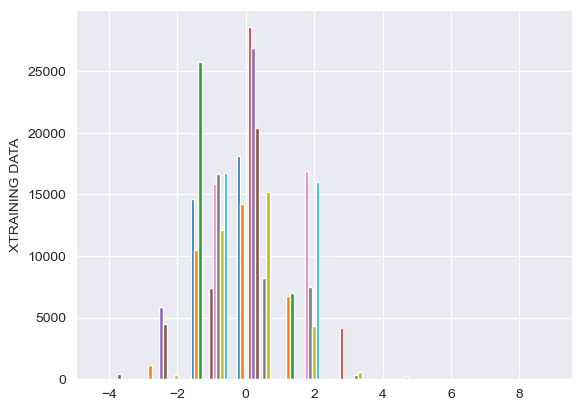

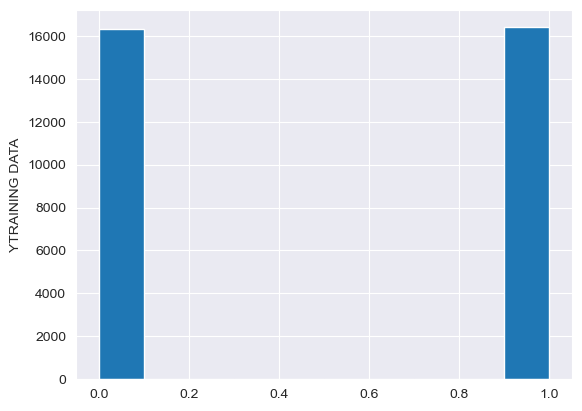

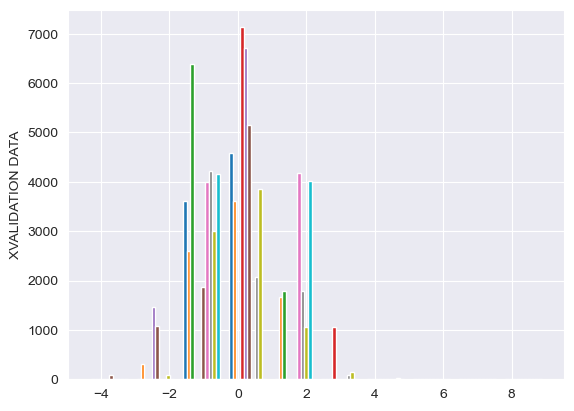

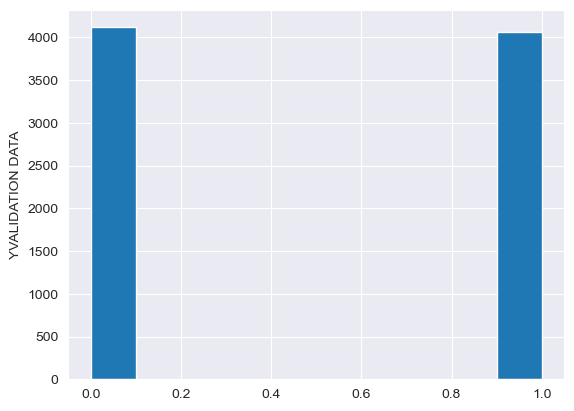

In [551]:
plt.hist(XTRAIN)
plt.ylabel('XTRAINING DATA')
plt.show()

plt.hist(YTRAIN)
plt.ylabel('YTRAINING DATA')
plt.show()

plt.hist(XVALIDATION)
plt.ylabel('XVALIDATION DATA')
plt.show()

plt.hist(YVALIDATION)
plt.ylabel('YVALIDATION DATA')
plt.show()

In [463]:
model5 = Sequential()

model5.add(Dense(1, input_dim=XTRAIN.shape[1], activation = "relu"))

In [464]:
model5.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [465]:
history5 = model5.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 981/1023 [===========================>..] - ETA: 0s - loss: 5.6497 - accuracy: 0.5082
Epoch 1: val_loss improved from inf to 5.49057, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 5.6484 - accuracy: 0.5088 - val_loss: 5.4906 - val_accuracy: 0.5197
Epoch 2/100
 989/1023 [============================>.] - ETA: 0s - loss: 5.3294 - accuracy: 0.5296
Epoch 2: val_loss improved from 5.49057 to 5.24352, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 1ms/step - loss: 5.3230 - accuracy: 0.5302 - val_loss: 5.2435 - val_accuracy: 0.5358
Epoch 3/100
1006/1023 [============================>.] - ETA: 0s - loss: 5.0986 - accuracy: 0.5437
Epoch 3: val_loss improved from 5.24352 to 5.01478, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 1ms/step - loss: 5.1001 - accuracy: 0.5434 - val_loss: 5.0148 - val_accuracy: 0.5470
Epoch 4/100
1000/1023 [============================>.] -

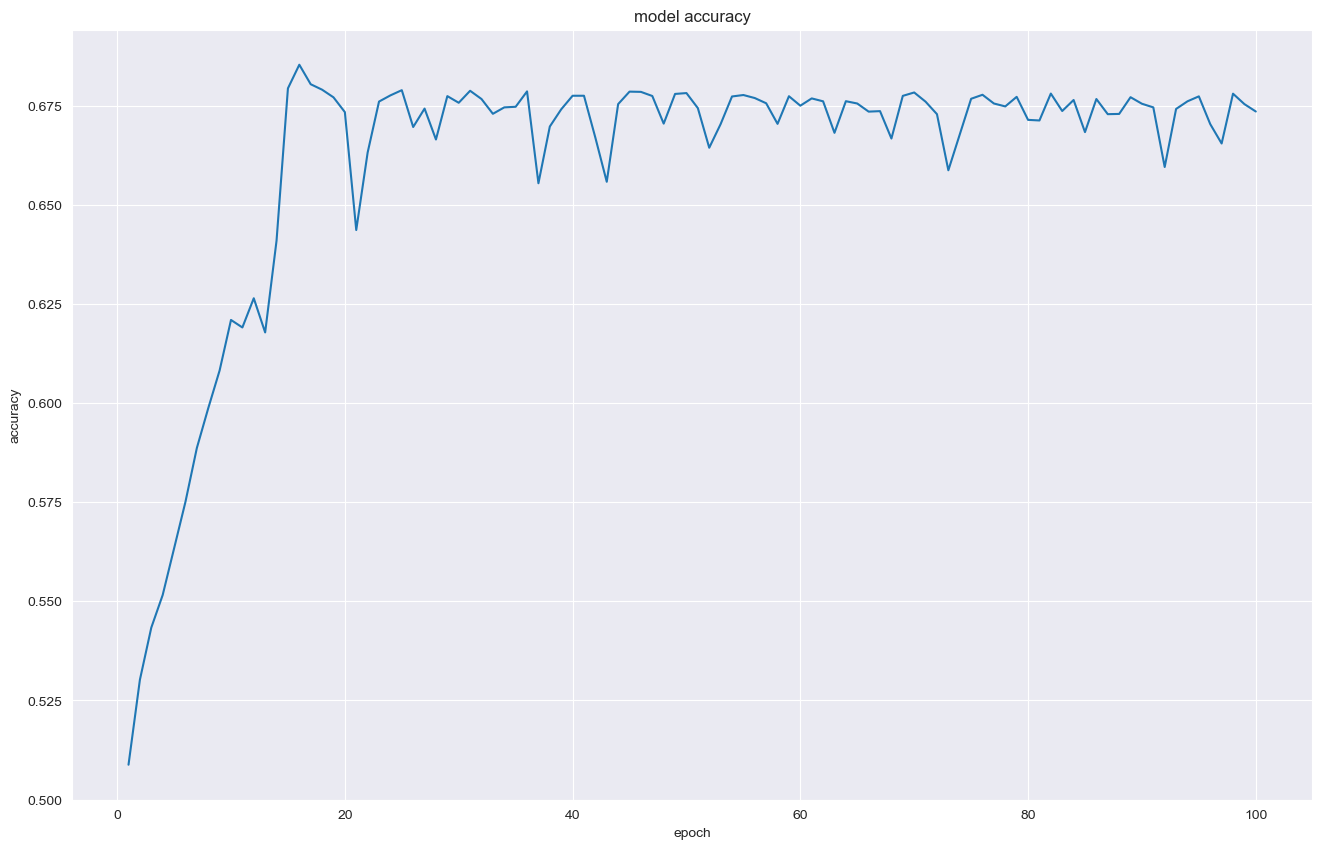

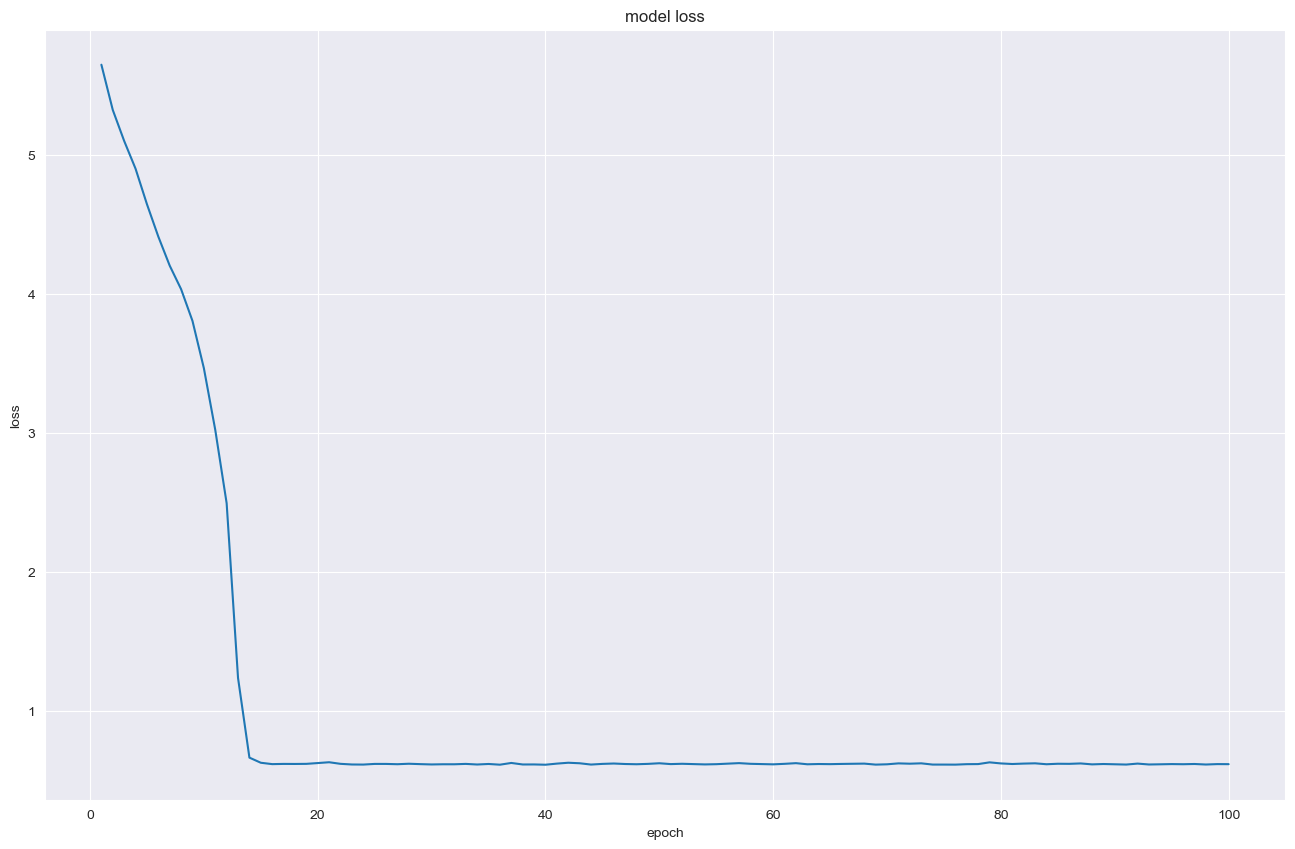

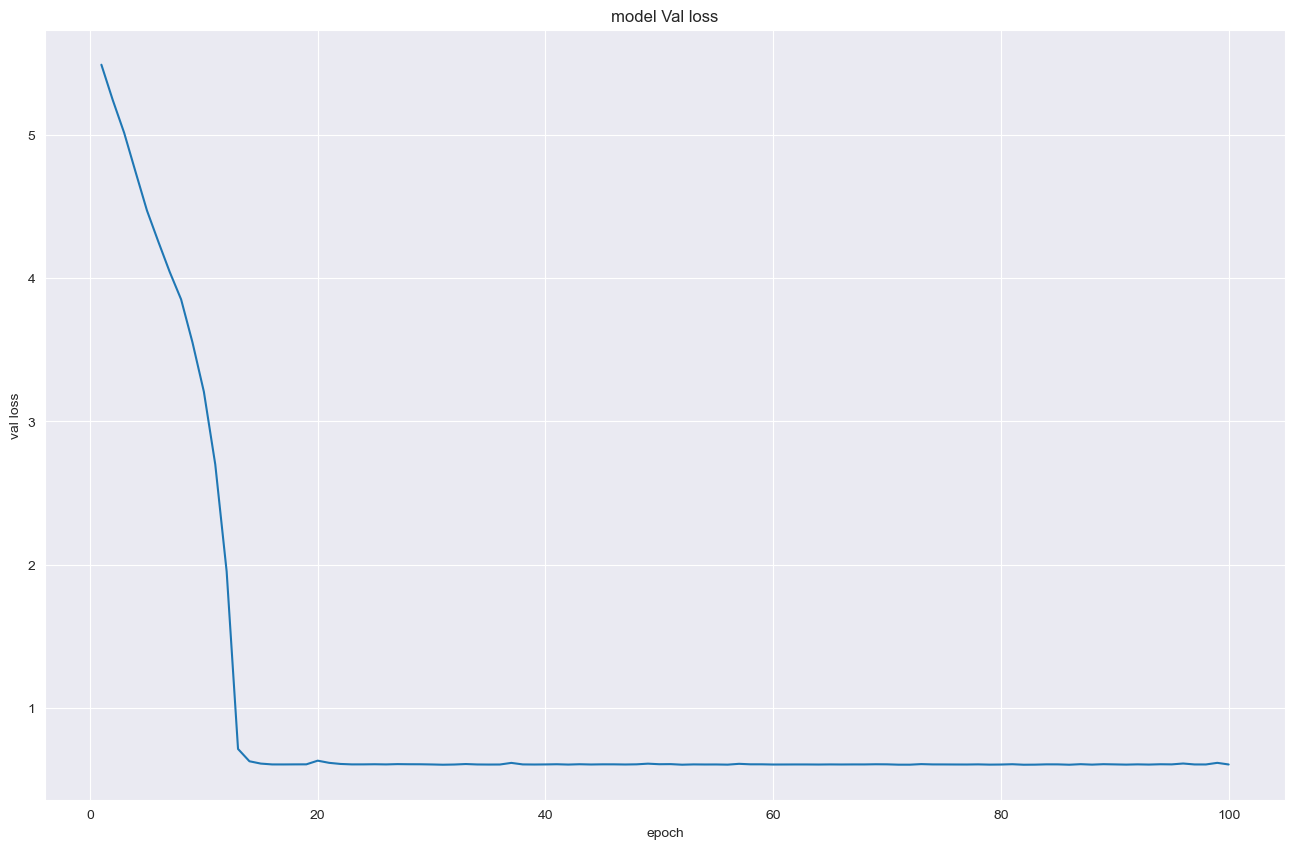

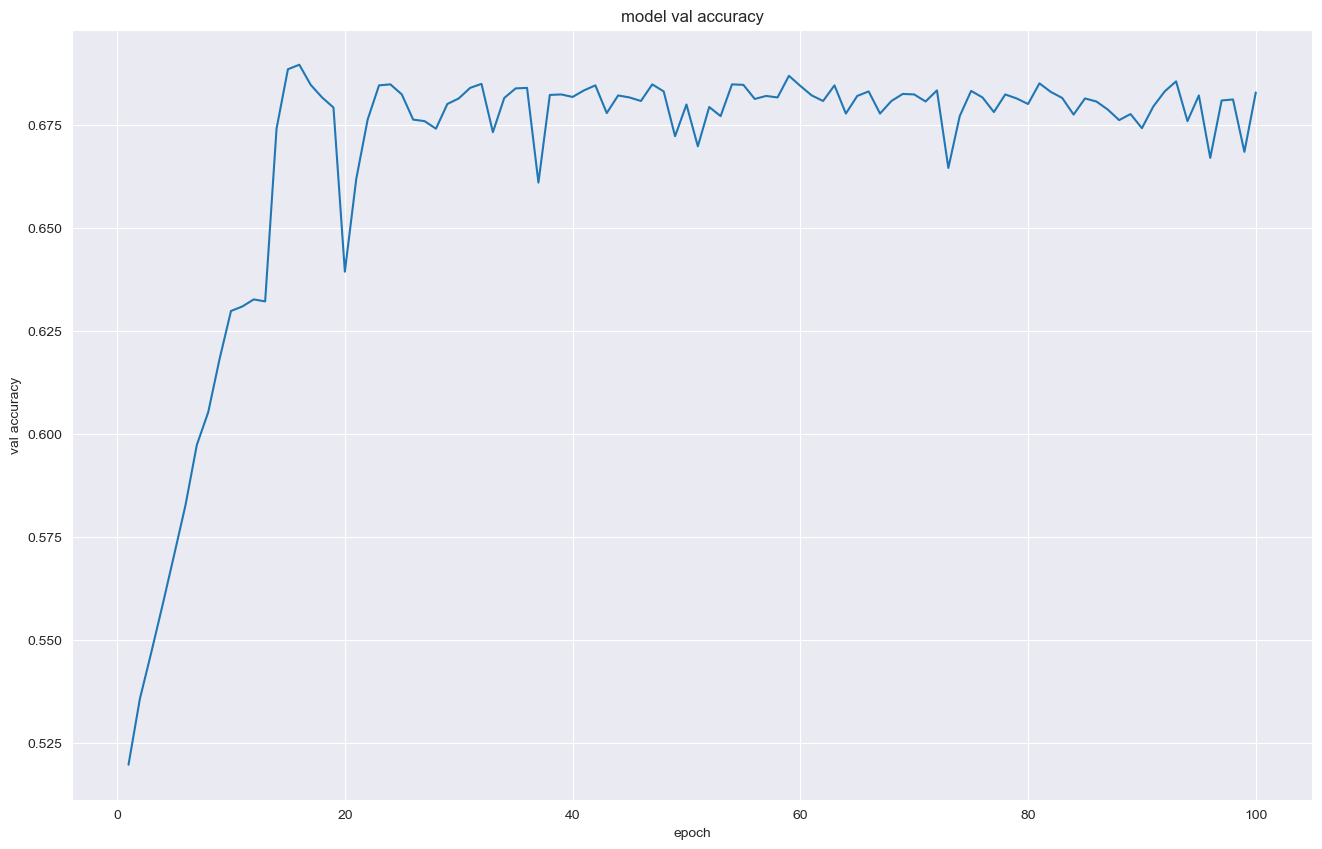

In [506]:
plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history5.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history5.history['val_loss'])
plt.title('model Val loss')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history5.history['val_accuracy'])
plt.title('model val accuracy')
plt.ylabel('val accuracy')
plt.xlabel('epoch')
plt.show()

In [467]:
model6 = Sequential()

model6.add(Dense(8, input_dim=XTRAIN.shape[1], activation = "relu"))
model6.add(Dense(4, activation = "relu"))
model6.add(Dense(1, activation = "sigmoid"))

In [468]:
XTRAIN.shape, XVALIDATION.shape

((32726, 10), (8181, 10))

In [469]:
model6.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model_1.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [470]:
history6 = model6.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1006/1023 [============================>.] - ETA: 0s - loss: 0.6340 - accuracy: 0.6220
Epoch 1: val_loss improved from inf to 0.58066, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6330 - accuracy: 0.6231 - val_loss: 0.5807 - val_accuracy: 0.6937
Epoch 2/100
1006/1023 [============================>.] - ETA: 0s - loss: 0.5845 - accuracy: 0.6932
Epoch 2: val_loss improved from 0.58066 to 0.56802, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5843 - accuracy: 0.6935 - val_loss: 0.5680 - val_accuracy: 0.7033
Epoch 3/100
1020/1023 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.7009
Epoch 3: val_loss improved from 0.56802 to 0.56059, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5750 - accuracy: 0.7008 - val_loss: 0.5606 - val_accuracy: 0.7088
Epoch 4/100
 988/1023 [===========================

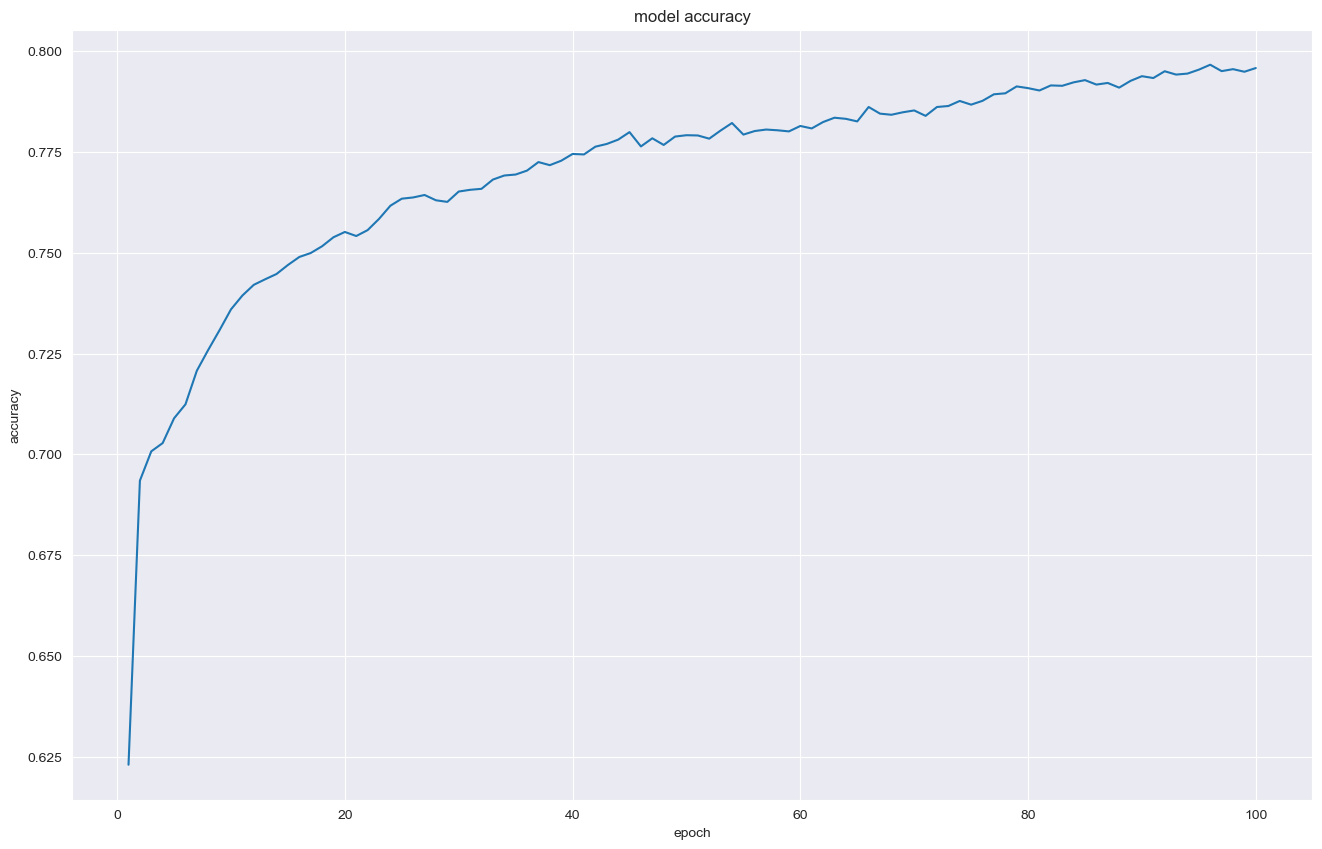

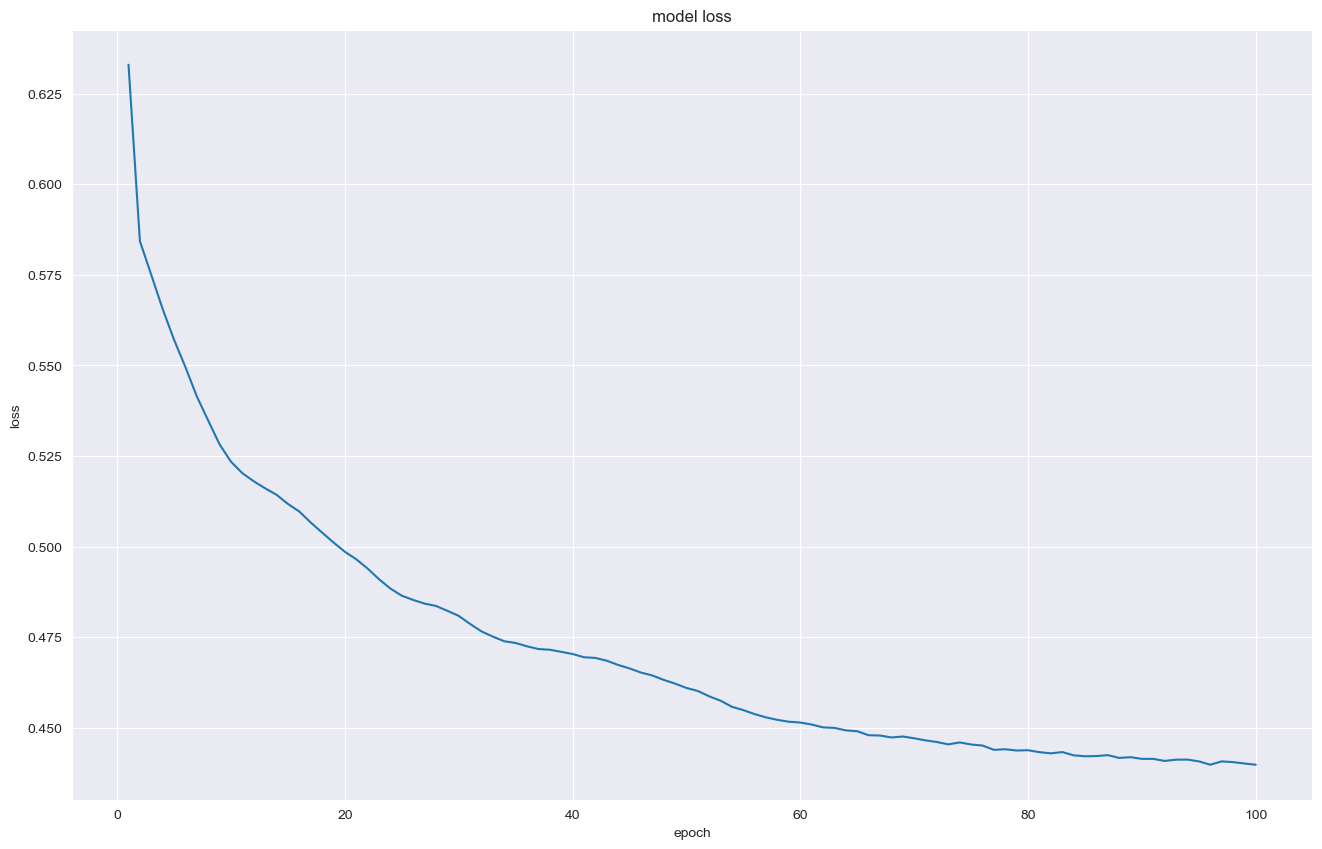

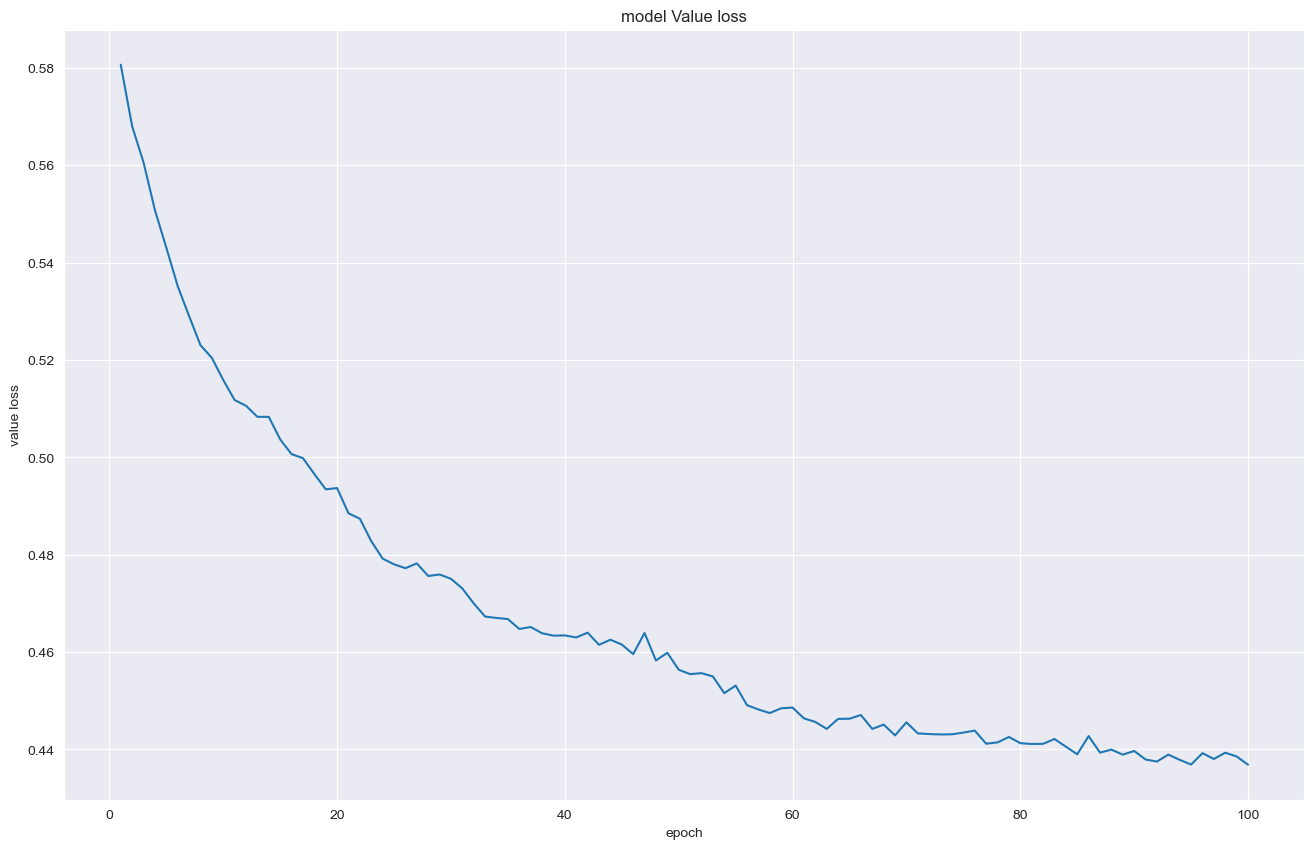

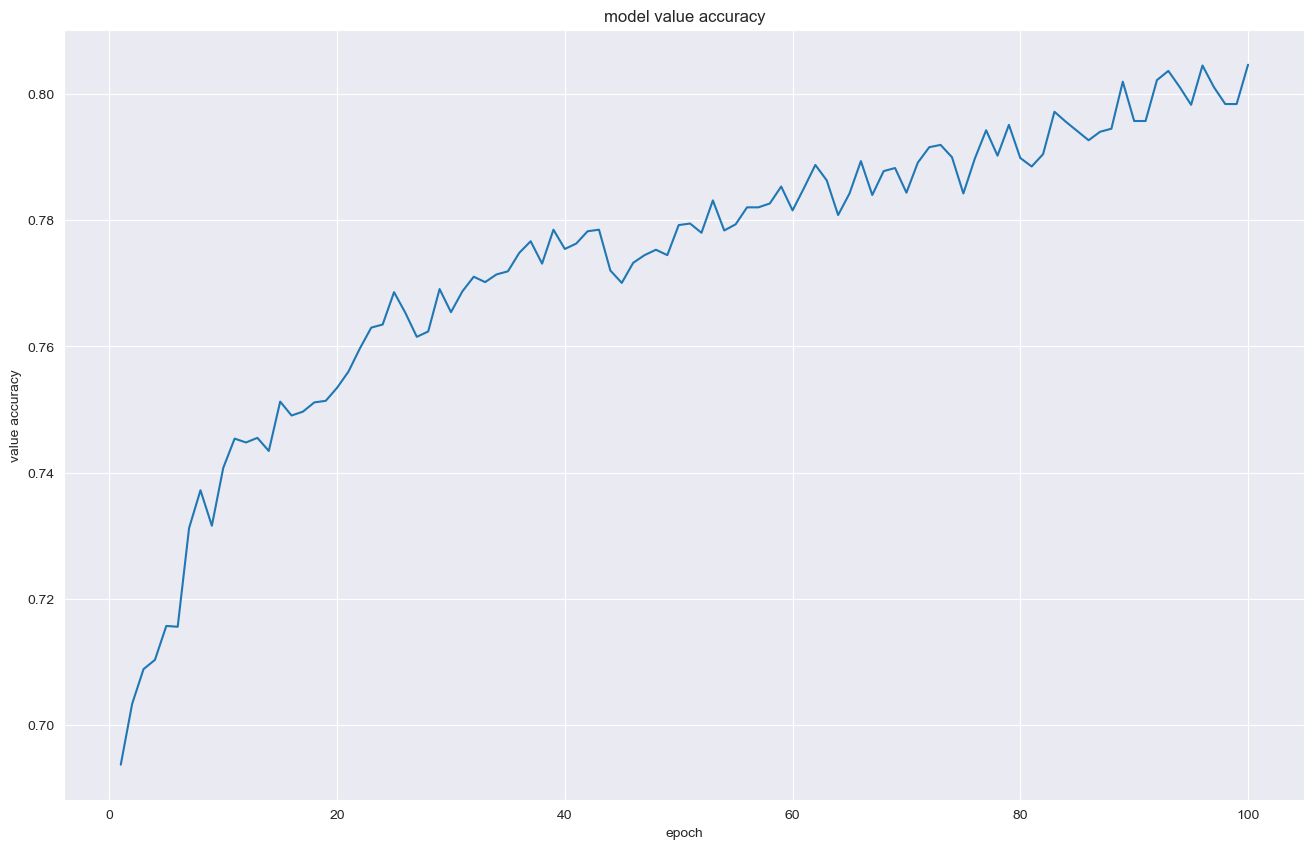

In [471]:
x = np.arange(1,101)
plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history6.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history6.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history6.history['val_loss'])
plt.title('model Value loss')
plt.ylabel('value loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history6.history['val_accuracy'])
plt.title('model value accuracy')
plt.ylabel('value accuracy')
plt.xlabel('epoch')
plt.show()

In [472]:
model7 = Sequential()

model7.add(Dense(32, input_dim=XTRAIN.shape[1], activation = "relu"))
model7.add(Dense(16, activation = "relu"))
model7.add(Dense(8, activation = "relu"))
model7.add(Dense(1, activation = "sigmoid"))

In [473]:
model7.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [474]:
history7 = model7.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1007/1023 [============================>.] - ETA: 0s - loss: 0.5814 - accuracy: 0.6945
Epoch 1: val_loss improved from inf to 0.53880, saving model to best_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5813 - accuracy: 0.6940 - val_loss: 0.5388 - val_accuracy: 0.7289
Epoch 2/100
1001/1023 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7269
Epoch 2: val_loss improved from 0.53880 to 0.51016, saving model to best_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7269 - val_loss: 0.5102 - val_accuracy: 0.7450
Epoch 3/100
1004/1023 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.7506
Epoch 3: val_loss improved from 0.51016 to 0.48346, saving model to best_weights.hdf5
1023/1023 [==============================] - 1s 1ms/step - loss: 0.5027 - accuracy: 0.7506 - val_loss: 0.4835 - val_accuracy: 0.7646
Epoch 4/100
1006/1023 [===========================

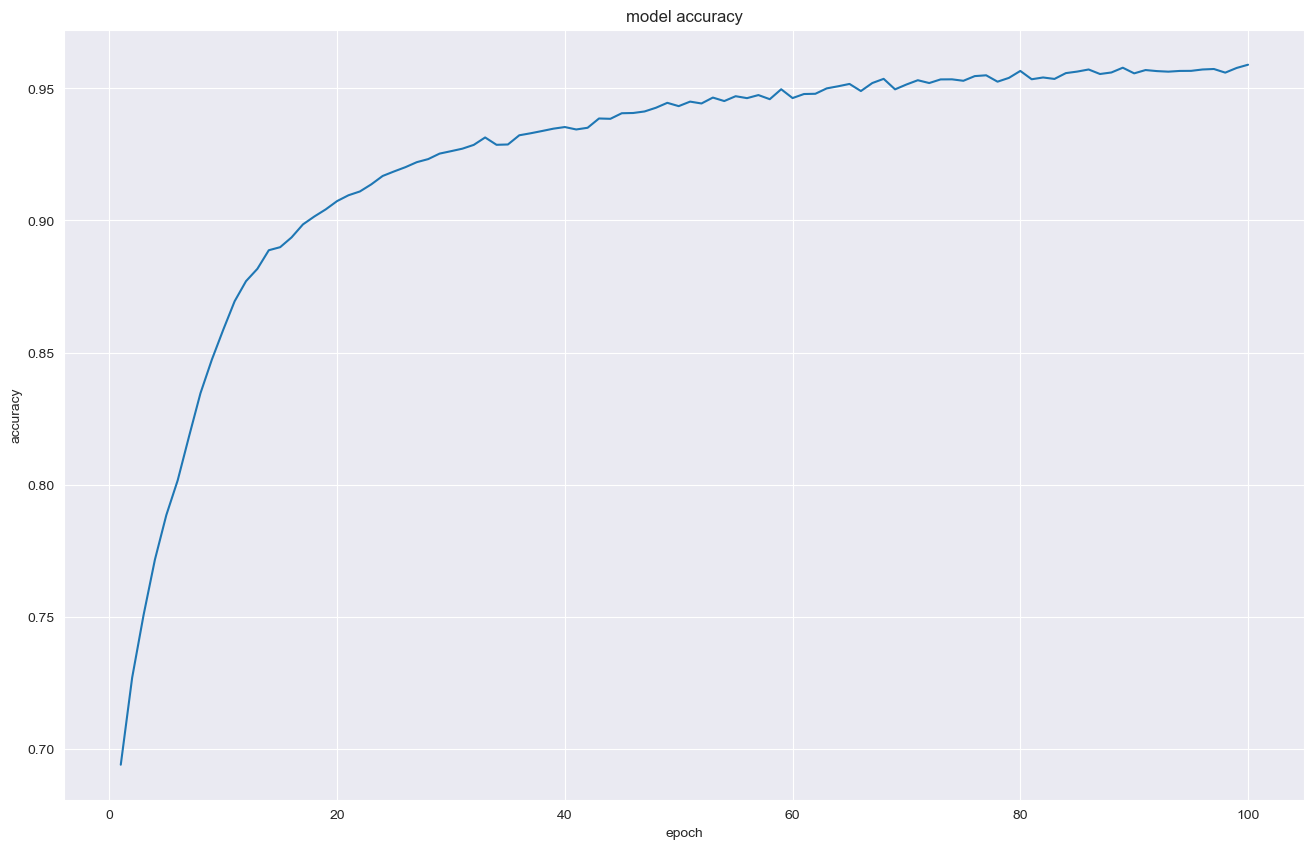

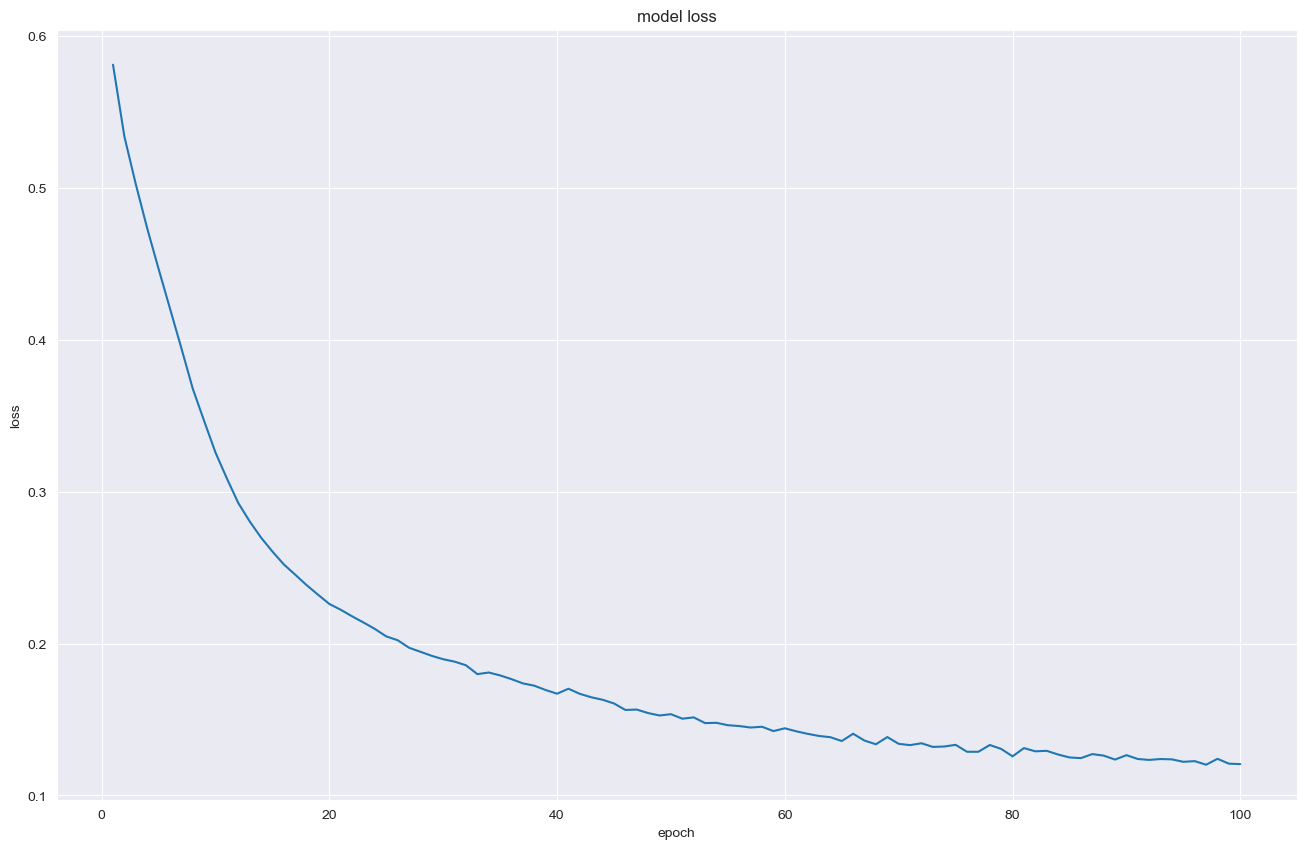

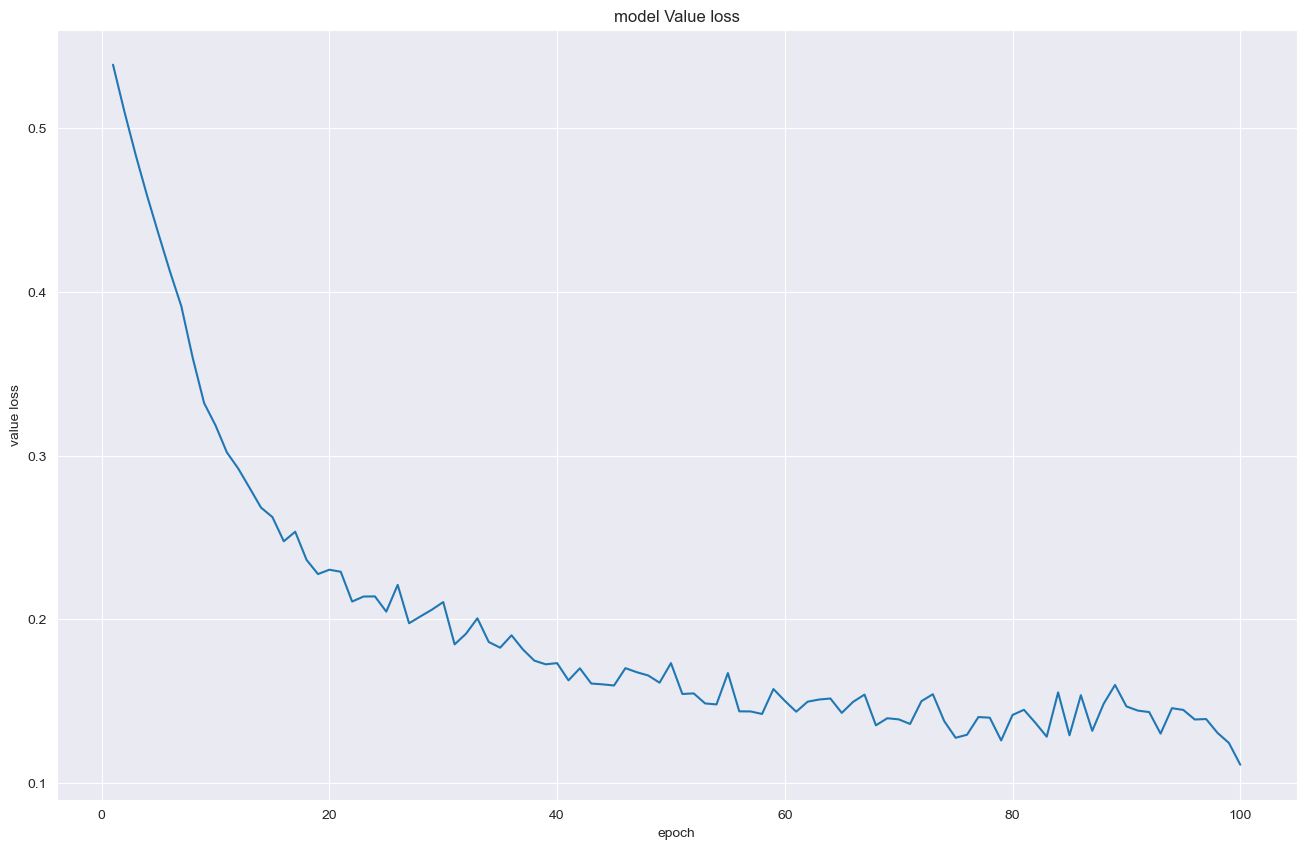

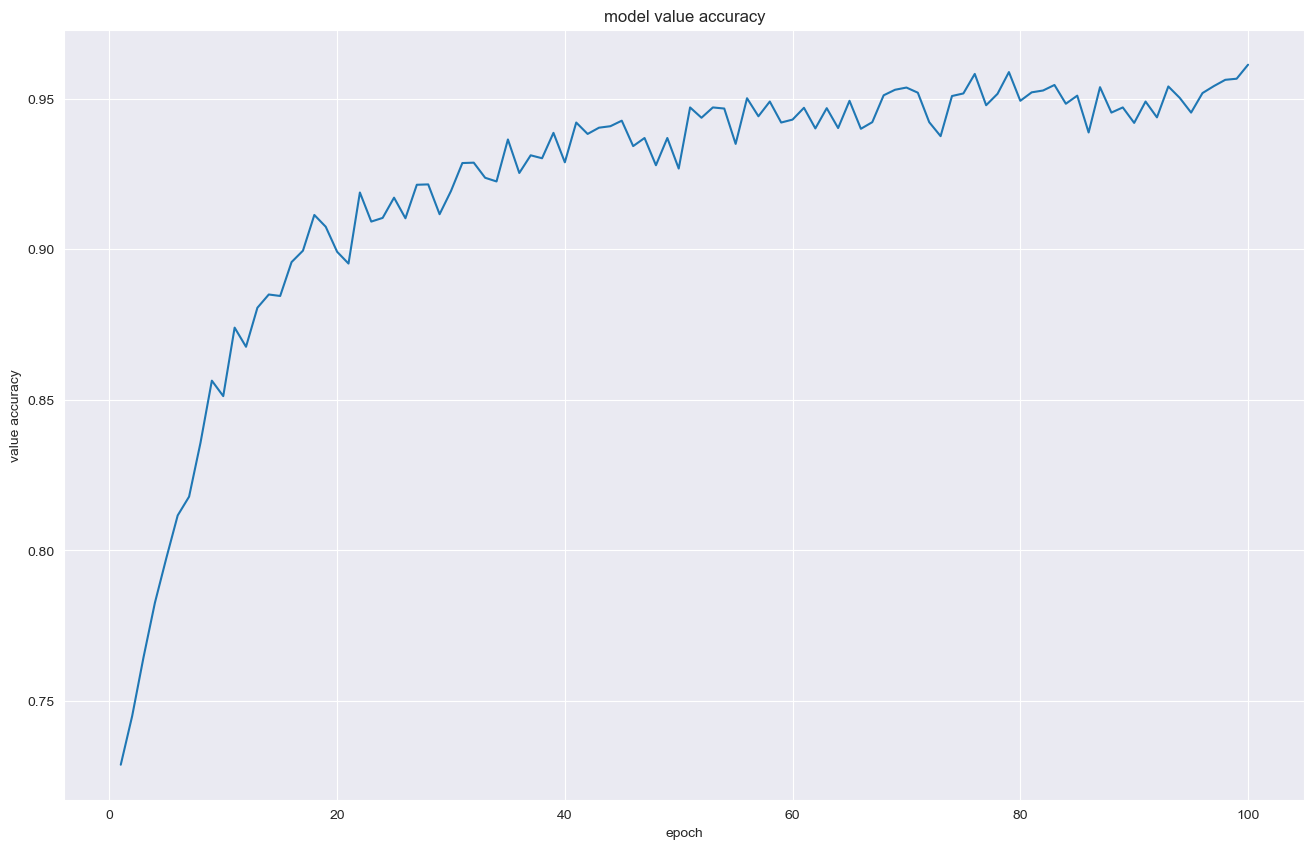

In [475]:
plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history7.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history7.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history7.history['val_loss'])
plt.title('model Value loss')
plt.ylabel('value loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history7.history['val_accuracy'])
plt.title('model value accuracy')
plt.ylabel('value accuracy')
plt.xlabel('epoch')
plt.show()

In [476]:
model8 = Sequential()

model8.add(Dense(36, input_dim=XTRAIN.shape[1], activation = "relu"))
model8.add(Dense(18, activation = "relu"))
model8.add(Dense(8, activation = "relu"))
model8.add(Dense(1, activation = "sigmoid"))

In [477]:
model8.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_point.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [478]:
history8 = model8.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 992/1023 [============================>.] - ETA: 0s - loss: 0.5800 - accuracy: 0.6906
Epoch 1: val_loss improved from inf to 0.53524, saving model to best_point.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5791 - accuracy: 0.6915 - val_loss: 0.5352 - val_accuracy: 0.7256
Epoch 2/100
1020/1023 [============================>.] - ETA: 0s - loss: 0.5215 - accuracy: 0.7334
Epoch 2: val_loss improved from 0.53524 to 0.49674, saving model to best_point.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5214 - accuracy: 0.7334 - val_loss: 0.4967 - val_accuracy: 0.7515
Epoch 3/100
 988/1023 [===========================>..] - ETA: 0s - loss: 0.4854 - accuracy: 0.7593
Epoch 3: val_loss improved from 0.49674 to 0.46021, saving model to best_point.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4846 - accuracy: 0.7596 - val_loss: 0.4602 - val_accuracy: 0.7746
Epoch 4/100
 986/1023 [===========================>..] -

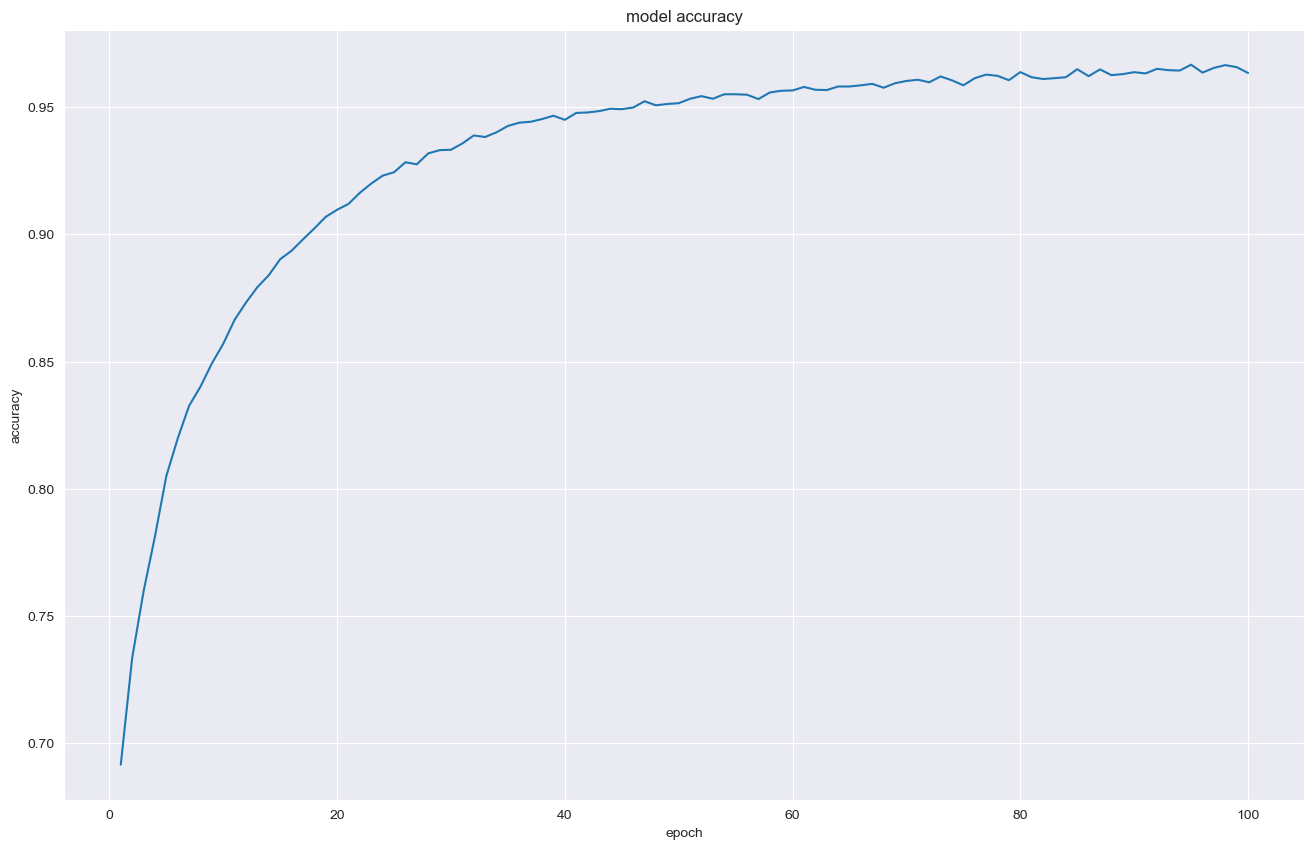

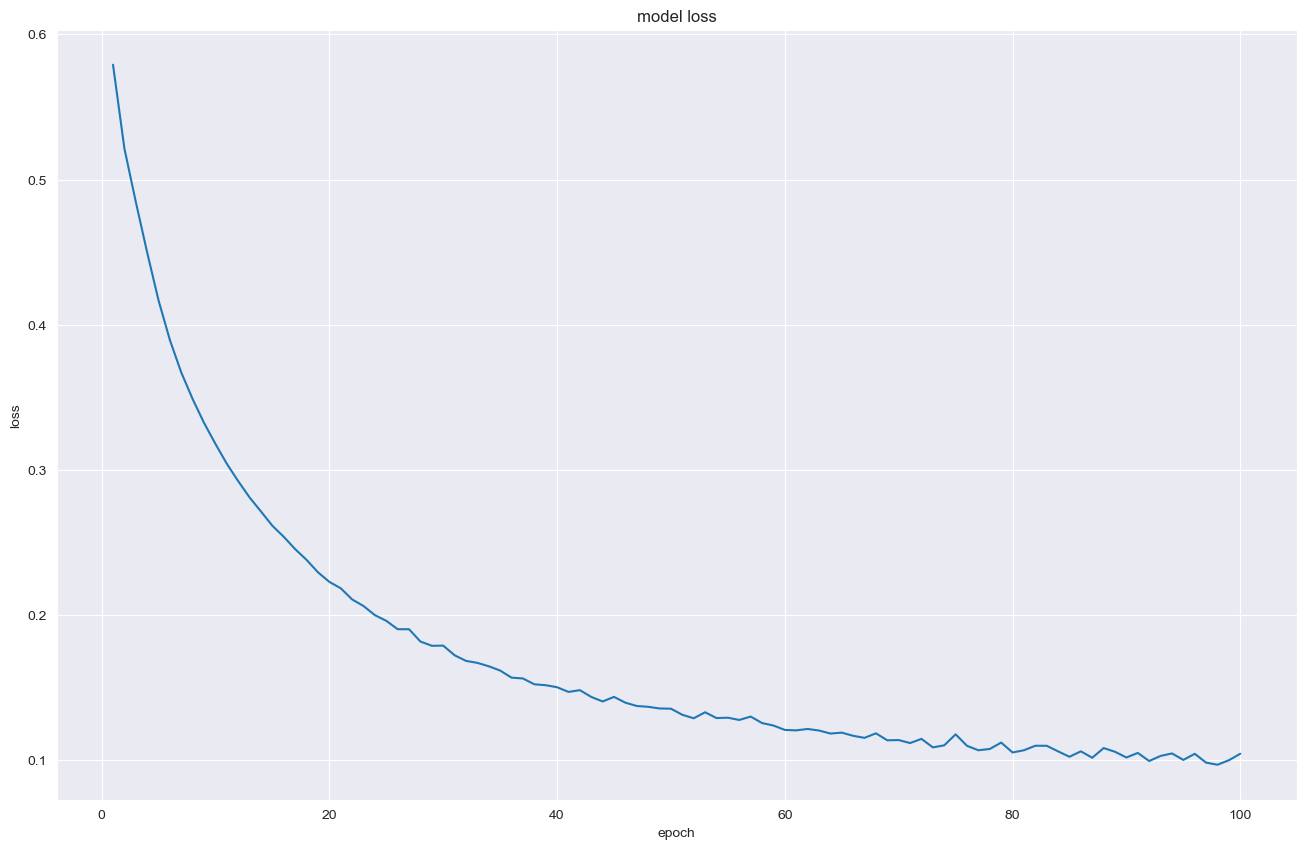

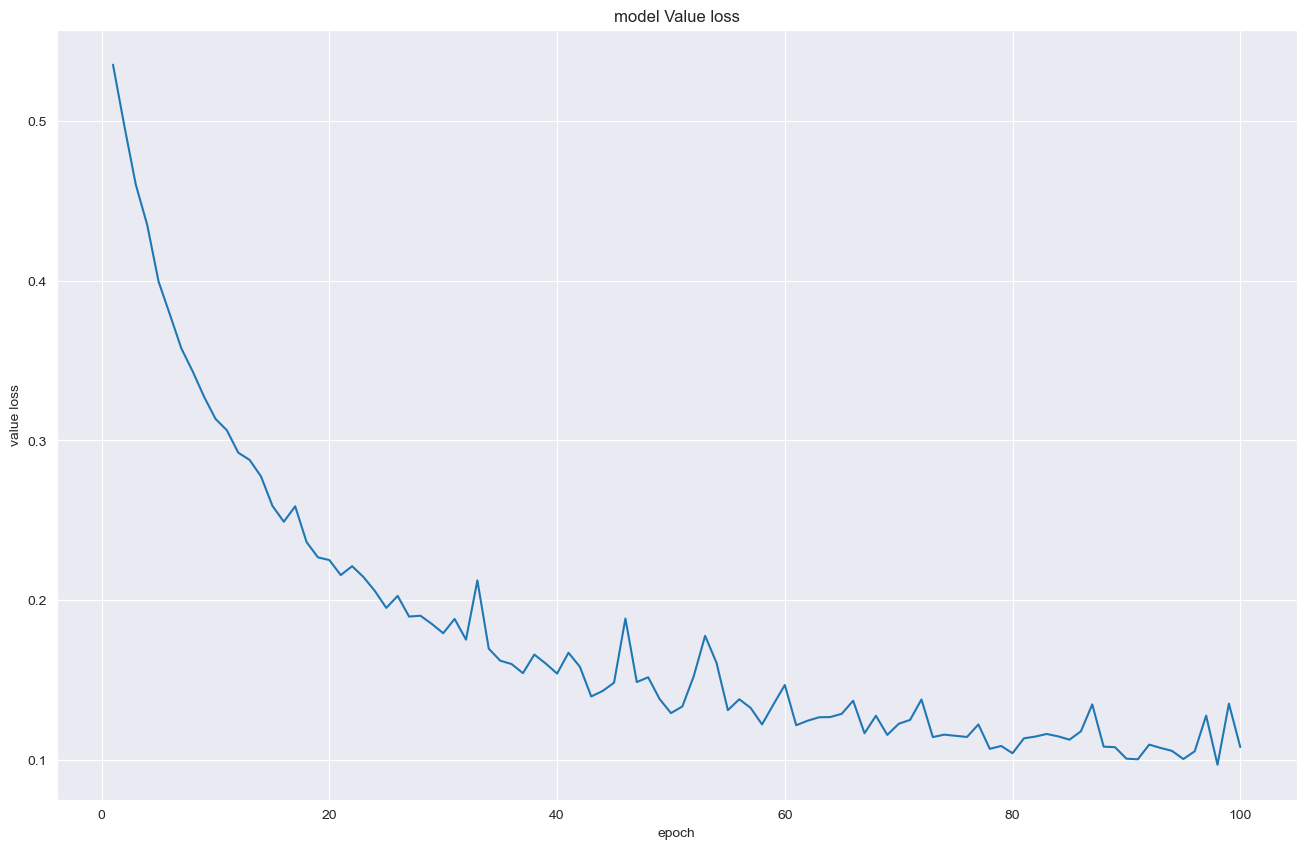

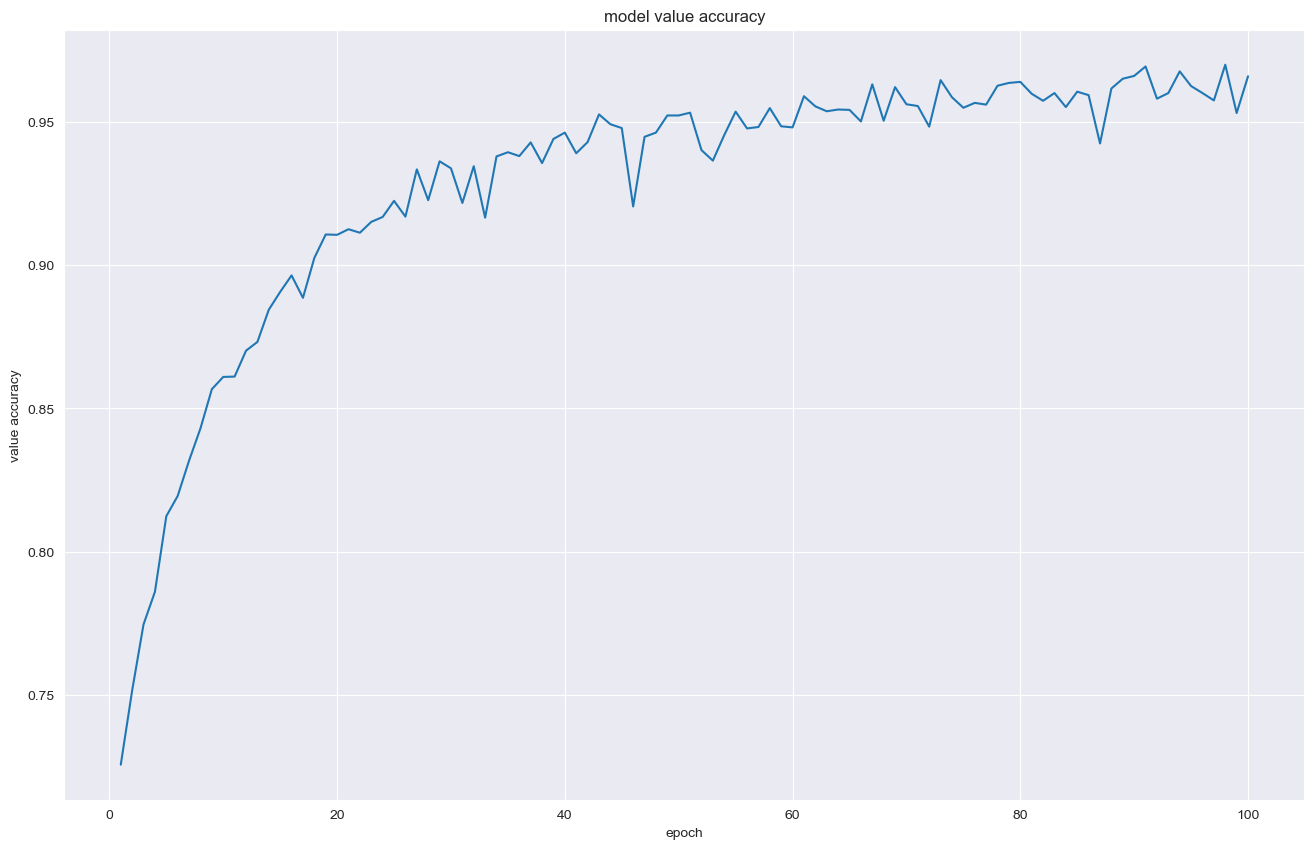

In [479]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history8.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history8.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history8.history['val_loss'])
plt.title('model Value loss')
plt.ylabel('value loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history8.history['val_accuracy'])
plt.title('model value accuracy')
plt.ylabel('value accuracy')
plt.xlabel('epoch')
plt.show()

In [480]:
model9 = Sequential()

model9.add(Dense(64, input_dim=XTRAIN.shape[1], activation = "tanh"))
model9.add(Dense(32, activation = "tanh"))
model9.add(Dense(16, activation = "tanh"))
model9.add(Dense(8, activation = "tanh"))
model9.add(Dense(1, activation = "sigmoid"))

In [481]:
model9.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_position.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [482]:
history9 = model9.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1013/1023 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7028
Epoch 1: val_loss improved from inf to 0.52903, saving model to best_position.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5697 - accuracy: 0.7032 - val_loss: 0.5290 - val_accuracy: 0.7315
Epoch 2/100
 986/1023 [===========================>..] - ETA: 0s - loss: 0.5106 - accuracy: 0.7412
Epoch 2: val_loss improved from 0.52903 to 0.47654, saving model to best_position.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5091 - accuracy: 0.7424 - val_loss: 0.4765 - val_accuracy: 0.7663
Epoch 3/100
 987/1023 [===========================>..] - ETA: 0s - loss: 0.4578 - accuracy: 0.7822
Epoch 3: val_loss improved from 0.47654 to 0.42477, saving model to best_position.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4567 - accuracy: 0.7824 - val_loss: 0.4248 - val_accuracy: 0.7978
Epoch 4/100
 988/1023 [========================

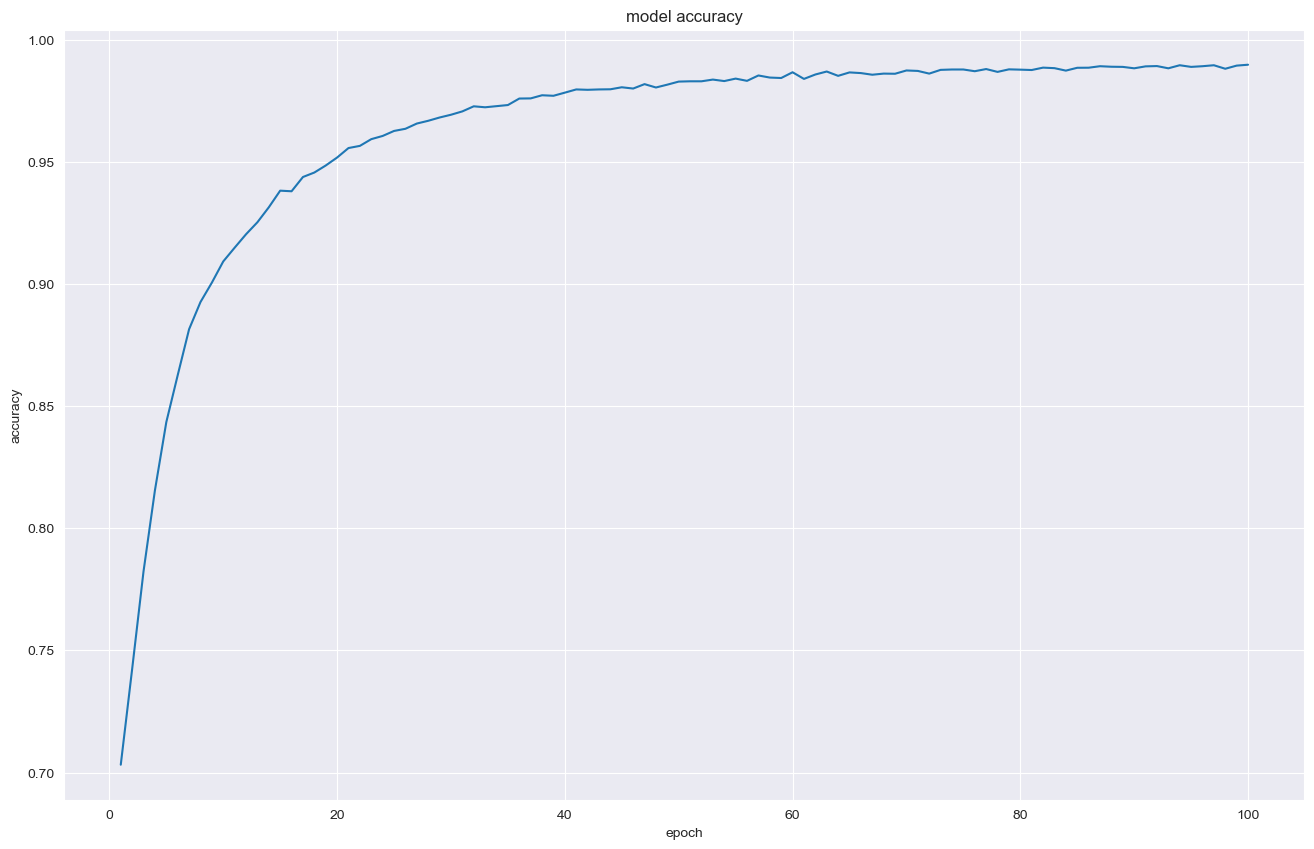

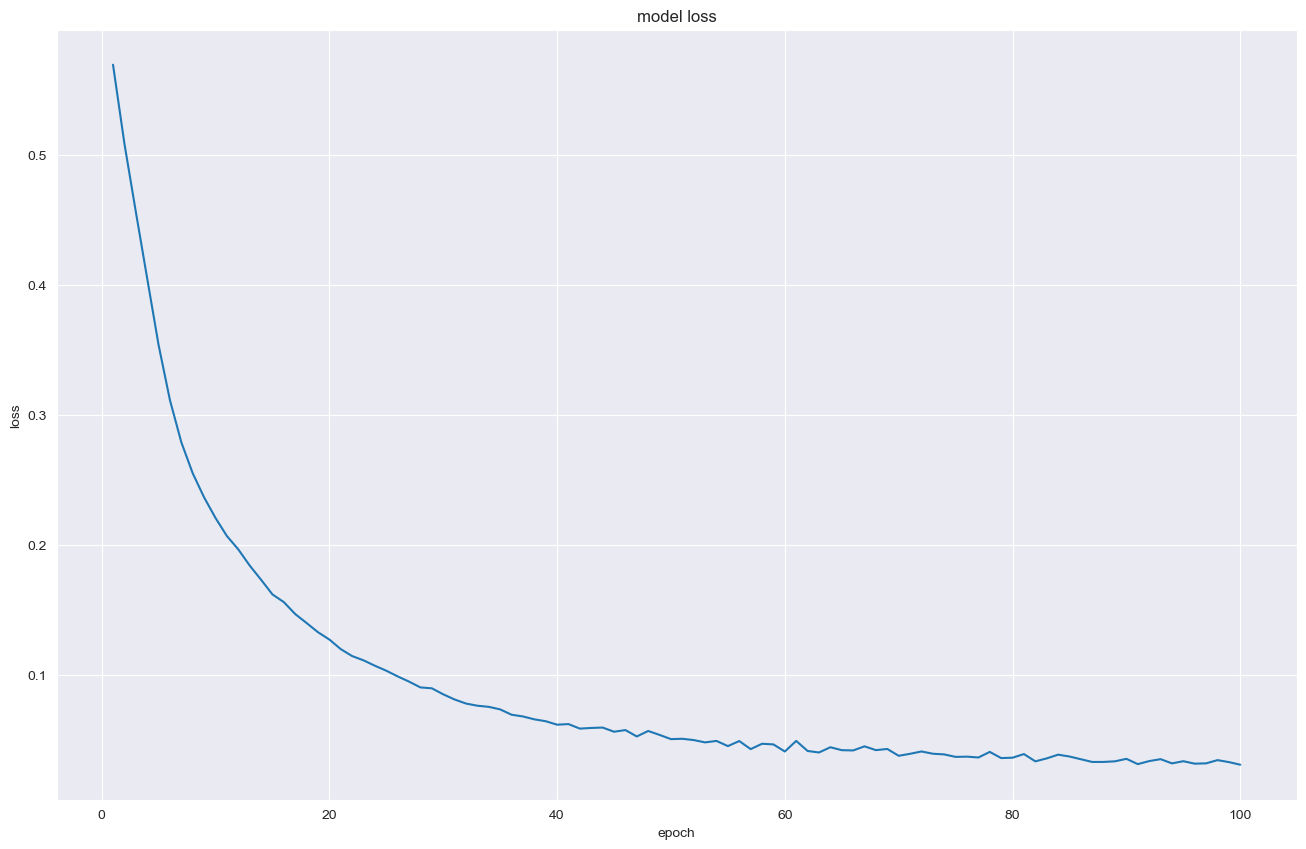

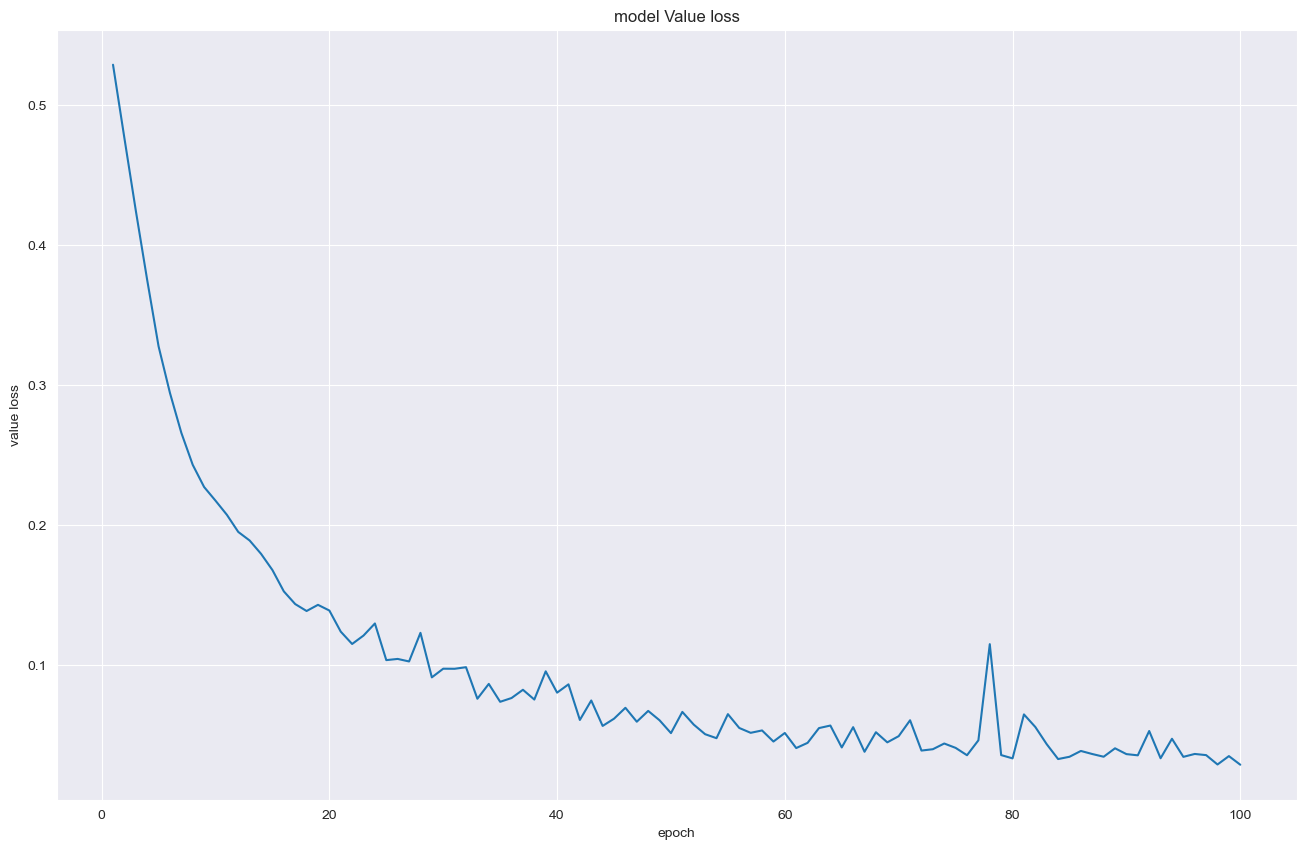

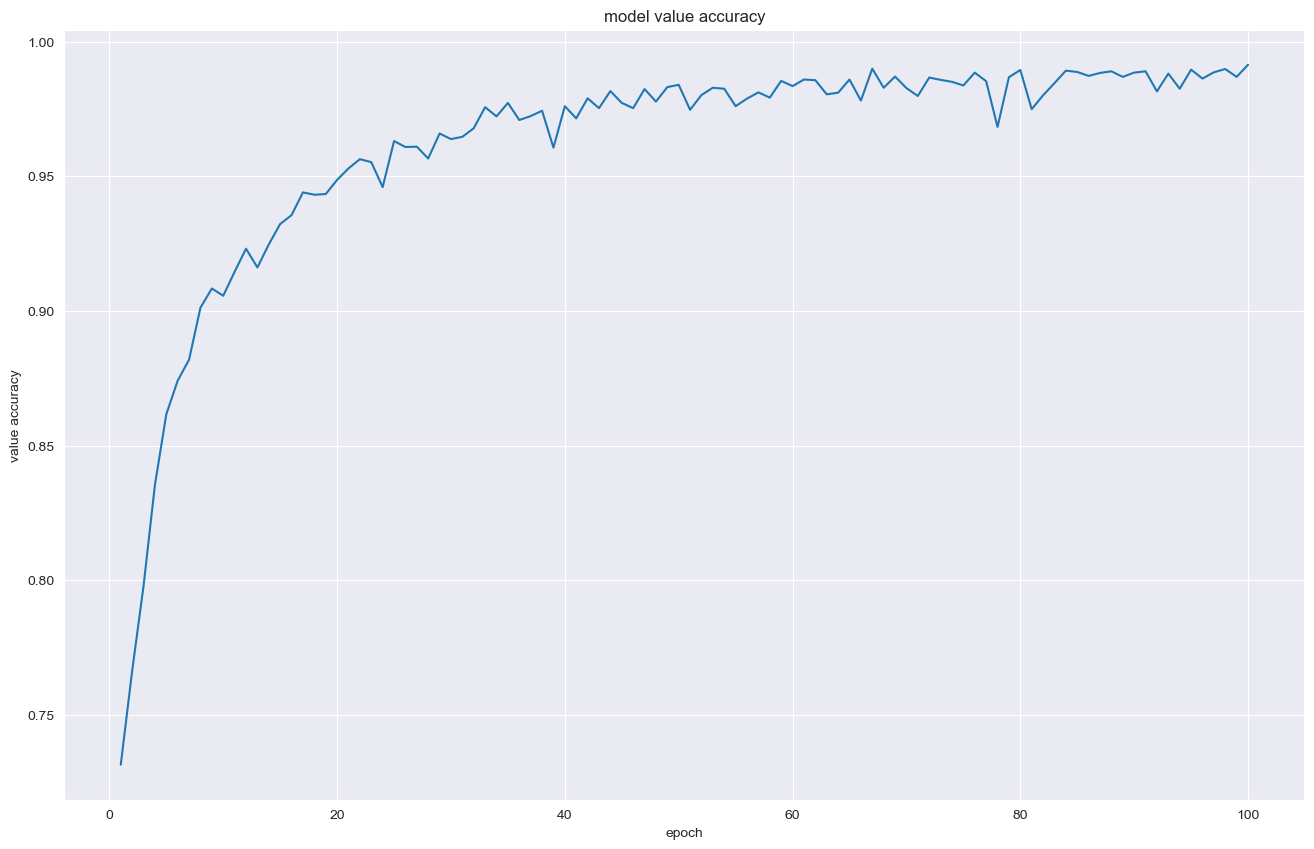

In [483]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history9.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history9.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history9.history['val_loss'])
plt.title('model Value loss')
plt.ylabel('value loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history9.history['val_accuracy'])
plt.title('model value accuracy')
plt.ylabel('value accuracy')
plt.xlabel('epoch')
plt.show()

<h5>Observation</h5><br>

<li>The above model of a training dataset gives the best accuracy of 98.97 at 100th epoch, which has 5 layers.</li>
<li>Input layer consists of 64 neurons and "tanh" as a activation function.</li>
<li>The other 3 Dense layers has 32,16 and 8 neurons respectively with activation function "tanh".
Output layer has single neuron with activation function "sigmoid"
    
Sticking with the accuracy as there is no further improvement.

<h2>Phase 4: Feature importance and reduction</h2>

In [486]:
model9.load_weights("best_position.hdf5")

In [552]:
df.shape

(40907, 11)

In [557]:
def train_model(feature_index):
    # Create the model
    single_feature_model = Sequential()
    
    single_feature_model.add(Dense(12, input_dim=1, activation='relu'))
    single_feature_model.add(Dense(8, activation='relu'))
    single_feature_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    single_feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#     Define the checkpoint callback
    checkpoint_path = f"model_checkpoint/feature_{feature_index}.hdf5"
    checkpoint_callback = ModelCheckpoint("Best_Weights", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1, mode="min")

    # Train the model
    history = single_feature_model.fit(XTRAIN[:, feature_index], YTRAIN, validation_data=(XVALIDATION[:, feature_index], YVALIDATION), epochs=100, callbacks=[checkpoint_callback])

    # Load the best model weights
#     single_feature_model.load_weights(checkpoint_path)

    # Evaluate the model on the validation set
    _, accuracy = single_feature_model.evaluate(X[:, feature_index], y, verbose=0)
    return accuracy



In [558]:
# Train models with single input features
accuracies = []
for i in range(10):
    accuracy = train_model(i)
    accuracies.append(accuracy)
    print(f"Feature {i}: {accuracy}")


Epoch 1/100
1000/1023 [============================>.] - ETA: 0s - loss: 0.6884 - accuracy: 0.5493
Epoch 1: val_loss improved from inf to 0.68548, saving model to Best_Weights
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6885 - accuracy: 0.5490 - val_loss: 0.6855 - val_accuracy: 0.5619
Epoch 2/100
1000/1023 [============================>.] - ETA: 0s - loss: 0.6875 - accuracy: 0.5537
Epoch 2: val_loss did not improve from 0.68548
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6875 - accuracy: 0.5535 - val_loss: 0.6857 - val_accuracy: 0.5619
Epoch 3/100
 992/1023 [============================>.] - ETA: 0s - loss: 0.6876 - accuracy: 0.5535
Epoch 3: val_loss did not improve from 0.68548
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6876 - accuracy: 0.5535 - val_loss: 0.6856 - val_accuracy: 0.5619
Epoch 4/100
 986/1023 [===========================>..] - ETA: 0s - loss: 0.6877 - accuracy: 0.5529
Epoch 4: val_loss did not improve 

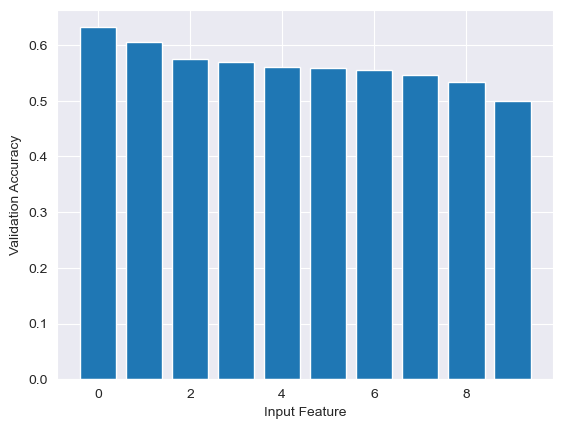

In [517]:
sorted_accuracies = sorted(accuracies, reverse=True)

# Plot the validation accuracies
plt.bar(range(len(sorted_accuracies)), sorted_accuracies)
plt.xlabel('Input Feature')
plt.ylabel('Validation Accuracy')
plt.show()